# Importing Python Packages

In [1]:
import openpyxl
import xlrd
import os
import glob

from pandas import DataFrame as df
from scipy.stats import trim_mean, kurtosis
from scipy.stats.mstats import mode, gmean, hmean

import numpy as np

import statsmodels.api as sm

import statsmodels.formula.api as smf

In [2]:
# import python packages

# import nltk (natural language tool kit)
import nltk
# stopwords, FreqDist, word_tokenize
from nltk.corpus import stopwords
from nltk import FreqDist, word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

import requests
from lxml import html
import csv
import pandas as pd

from os import path

import matplotlib.pyplot as plt
%matplotlib inline


#regular expression
import re
#csv
import csv
# Excel-like format
import pandas as pd
#data visualization
import matplotlib.pyplot as plt
% matplotlib inline

import numpy as np

import statsmodels.api as sm

import statsmodels.formula.api as smf

import seaborn as sns
np.random.seed(sum(map(ord, "aesthetics")))


# Importing Data

## Opening the Correct Directory

In [3]:
os.chdir('C:\\Users\\millsj.ADMIN\\Desktop\\GENBA 894\\2018_DataChallenges_Teradata\\National Teams\\')

In [4]:
# filenames
excel_names = ["2013-2017 National Team Activity.xlsx"]

# read them in
excels = [pd.ExcelFile(name) for name in excel_names]

# turn them into dataframes
frames = [x.parse(x.sheet_names[0],index_col=None) for x in excels]

# delete the first row for all frames except the first
# i.e. remove the header row -- assumes it's the first
frames[1:] = [df[1:] for df in frames[1:]]

# concatenate them..
nationalteams = pd.concat(frames)

# Check headers
nationalteams.head(3)

,National Team Name,Event Chapter,Event Category,Event Type,Local Team Name,Event Name,Event Start Date,Event Month,Event Day,Event Year,...,Local Team Captain Call Status,Local Team Captain Contact By Phone OK? (Y/N),Local Team Captain City,Local Team Captain State/Province,Local Team Captain Zip Code,Local Team Captain Bad Address Flag,Local Team Captain Contact By Mail OK? (Y/N),Local Team Captain Active Flag,Local Team Captain Deceased Flag,Local Team Captain Primary Connection To MS
0,NaN,ALC,Bike,MS 150 (2 Day Bike),Mobilians on Bikes,ALC 2016 Bike MS: Tour de Beach,2016-09-17,9,17,2016,...,G,Yes,Mobile,AL,36695.0,No,No,Yes,No,No Connection
1,American Express Bike Team,AZA,Bike,MS 150 (2 Day Bike),Ride For Life,AZA 2018 Bike MS: Arizona,2018-03-24,3,24,2018,...,G,Yes,Glendale,AZ,85308.0,No,Yes,Yes,No,Friend has MS
2,Point B Bike Team,AZA,Bike,MS 150 (2 Day Bike),Point B Phoenix,AZA 2018 Bike MS: Arizona,2018-03-24,3,24,2018,...,G,Yes,Mesa,AZ,85203.0,Yes,No,Yes,No,Relative has MS


In [5]:
# convert string to integers
#biketeams['Team Captain Accept Email'] = (biketeams['Team Captain Accept Email'] == 'TRUE').astype(int)

In [6]:
# make sure the conversion worked
#biketeams.head(3)

# Looking for Data Anomalies

In [7]:
# List of all headers
# nationalteams['National Team Name','Event Chapter','Event Category','Event Type','Local Team Name','Event Name','Event Start Date','Location','Corporate Name','Revenue Raised','Number of Team Members (local)','Local Team Captain Member ID','Local Team Captain Contact ID','Local Team Captain Email Domain','Local Team Captain Bad Email Flag','Local Team Captain Contact By Email OK? (Y/N)','Local Team Captain Phone Type','Local Team Captain Call Status','Local Team Captain Contact By Phone OK? (Y/N)','Local Team Captain City','Local Team Captain State/Province','Local Team Captain Zip Code','Local Team Captain Bad Address Flag','Local Team Captain Contact By Mail OK? (Y/N)','Local Team Captain Active Flag','Local Team Captain Deceased Flag','Local Team Captain Primary Connection To MS']

In [8]:
# counting zero values
print((nationalteams[['National Team Name','Event Chapter','Event Category','Event Type','Local Team Name','Event Name','Event Start Date','Location','Corporate Name','Revenue Raised','Number of Team Members (local)','Local Team Captain Member ID','Local Team Captain Contact ID','Local Team Captain Email Domain','Local Team Captain Bad Email Flag','Local Team Captain Contact By Email OK? (Y/N)','Local Team Captain Phone Type','Local Team Captain Call Status','Local Team Captain Contact By Phone OK? (Y/N)','Local Team Captain City','Local Team Captain State/Province','Local Team Captain Zip Code','Local Team Captain Bad Address Flag','Local Team Captain Contact By Mail OK? (Y/N)','Local Team Captain Active Flag','Local Team Captain Deceased Flag','Local Team Captain Primary Connection To MS']] == 0).sum())


National Team Name                                0
Event Chapter                                     0
Event Category                                    0
Event Type                                        0
Local Team Name                                   0
Event Name                                        0
Event Start Date                                  0
Location                                          0
Corporate Name                                    0
Revenue Raised                                   83
Number of Team Members (local)                    0
Local Team Captain Member ID                      0
Local Team Captain Contact ID                     0
Local Team Captain Email Domain                   0
Local Team Captain Bad Email Flag                 0
Local Team Captain Contact By Email OK? (Y/N)     0
Local Team Captain Phone Type                     0
Local Team Captain Call Status                    0
Local Team Captain Contact By Phone OK? (Y/N)     0
Local Team C

In [9]:
# Counting missing values
nationalteamsnull=(nationalteams[['National Team Name','Event Chapter','Event Category','Event Type','Local Team Name','Event Name','Event Start Date','Location','Corporate Name','Revenue Raised','Number of Team Members (local)','Local Team Captain Member ID','Local Team Captain Contact ID','Local Team Captain Email Domain','Local Team Captain Bad Email Flag','Local Team Captain Contact By Email OK? (Y/N)','Local Team Captain Phone Type','Local Team Captain Call Status','Local Team Captain Contact By Phone OK? (Y/N)','Local Team Captain City','Local Team Captain State/Province','Local Team Captain Zip Code','Local Team Captain Bad Address Flag','Local Team Captain Contact By Mail OK? (Y/N)','Local Team Captain Active Flag','Local Team Captain Deceased Flag','Local Team Captain Primary Connection To MS']])

print(nationalteamsnull.isnull().sum())




National Team Name                               162
Event Chapter                                      0
Event Category                                     0
Event Type                                         0
Local Team Name                                    0
Event Name                                         0
Event Start Date                                   0
Location                                         190
Corporate Name                                   810
Revenue Raised                                     0
Number of Team Members (local)                     0
Local Team Captain Member ID                      60
Local Team Captain Contact ID                     60
Local Team Captain Email Domain                   60
Local Team Captain Bad Email Flag                 60
Local Team Captain Contact By Email OK? (Y/N)     60
Local Team Captain Phone Type                     68
Local Team Captain Call Status                    68
Local Team Captain Contact By Phone OK? (Y/N) 

In [10]:
nationalteams['Local Team Captain Primary Connection To MS'].value_counts()

Friend has MS      316
Relative has MS    103
Has MS              58
None                58
No Connection       48
Parent has MS       46
Spouse has MS       44
Other               35
Child has MS        25
Sibling has MS      17
Name: Local Team Captain Primary Connection To MS, dtype: int64

In [11]:
nationalteams['Local Team Captain State/Province'].value_counts()

TX    104
PA     56
NJ     54
CA     48
MN     39
NY     34
FL     33
MA     32
IL     31
MI     30
OH     28
NC     23
WA     21
CO     20
UT     16
MO     16
MD     15
VA     13
CT     12
AZ     10
GA     10
WI      9
KY      7
AL      7
KS      7
TN      7
NH      5
DC      5
DE      5
AR      5
IN      4
OK      4
AK      3
OR      3
IA      3
NE      3
NV      3
RI      3
NM      3
WV      2
SD      2
MS      2
LA      2
ND      1
SC      1
ME      1
MT      1
Name: Local Team Captain State/Province, dtype: int64

In [12]:
nationalteams['Local Team Captain Primary Connection To MS'].value_counts()

Friend has MS      316
Relative has MS    103
Has MS              58
None                58
No Connection       48
Parent has MS       46
Spouse has MS       44
Other               35
Child has MS        25
Sibling has MS      17
Name: Local Team Captain Primary Connection To MS, dtype: int64

# Data Analysis

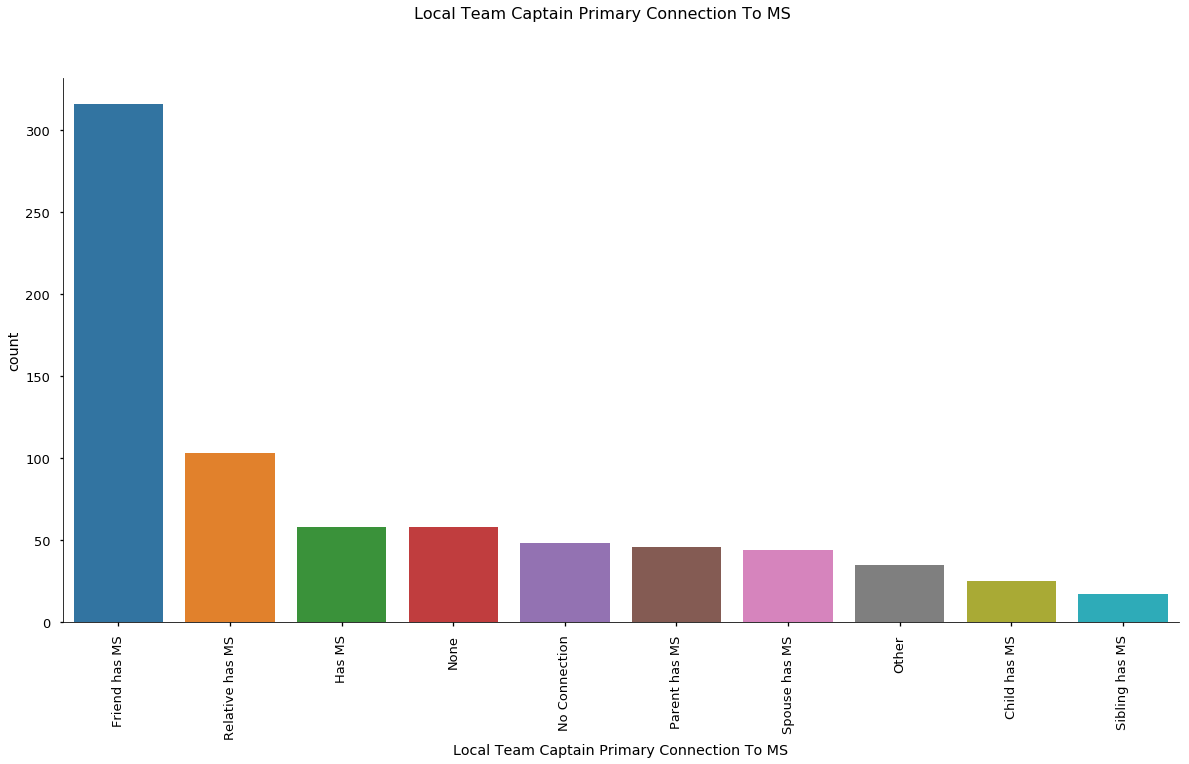

In [13]:
plt.figure(figsize=(20,10))
sns.set_context("talk")
sns.countplot(x='Local Team Captain Primary Connection To MS', data=nationalteams,order = nationalteams['Local Team Captain Primary Connection To MS'].value_counts().index)
plt.xticks(rotation=90)
plt.suptitle('Local Team Captain Primary Connection To MS', fontsize=16)
sns.despine()


Text(0.5,0.98,'Local Team Captain Primary Connection to MS by Revenue raised and OK to Email')

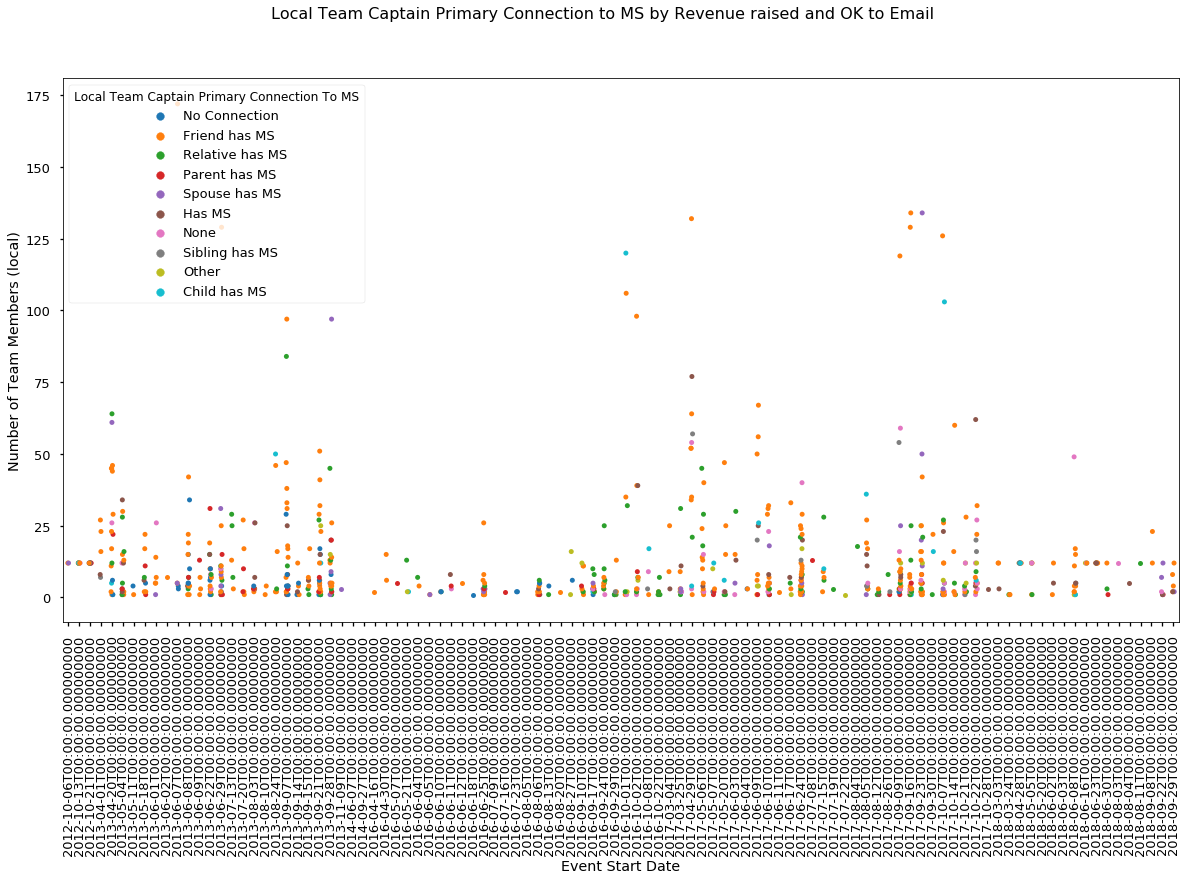

In [14]:
plt.figure(figsize=(20,10))

sns.stripplot(x='Event Start Date',y="Number of Team Members (local)",hue="Local Team Captain Primary Connection To MS", data=nationalteams, jitter=True)
plt.xticks(rotation=90)
plt.suptitle('Local Team Captain Primary Connection to MS by Revenue raised and OK to Email', fontsize=16)



In [15]:
#compute count of values in columns
nationalteams['Local Team Captain Primary Connection To MS'].value_counts()

Friend has MS      316
Relative has MS    103
Has MS              58
None                58
No Connection       48
Parent has MS       46
Spouse has MS       44
Other               35
Child has MS        25
Sibling has MS      17
Name: Local Team Captain Primary Connection To MS, dtype: int64

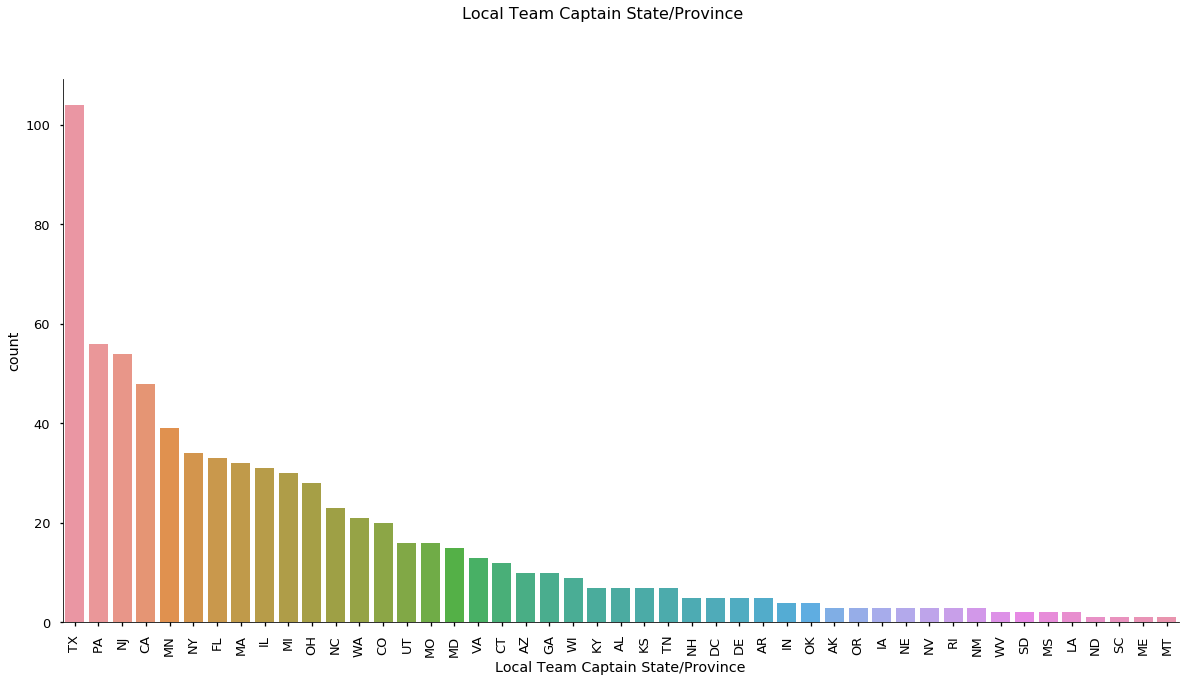

In [16]:
#sns.set_context("paper")
plt.figure(figsize=(20,10))
sns.countplot(x='Local Team Captain State/Province', data=nationalteams,order = nationalteams['Local Team Captain State/Province'].value_counts().index)
plt.xticks(rotation=90)
plt.suptitle('Local Team Captain State/Province', fontsize=16)

sns.despine()
#plt.tight_layout()

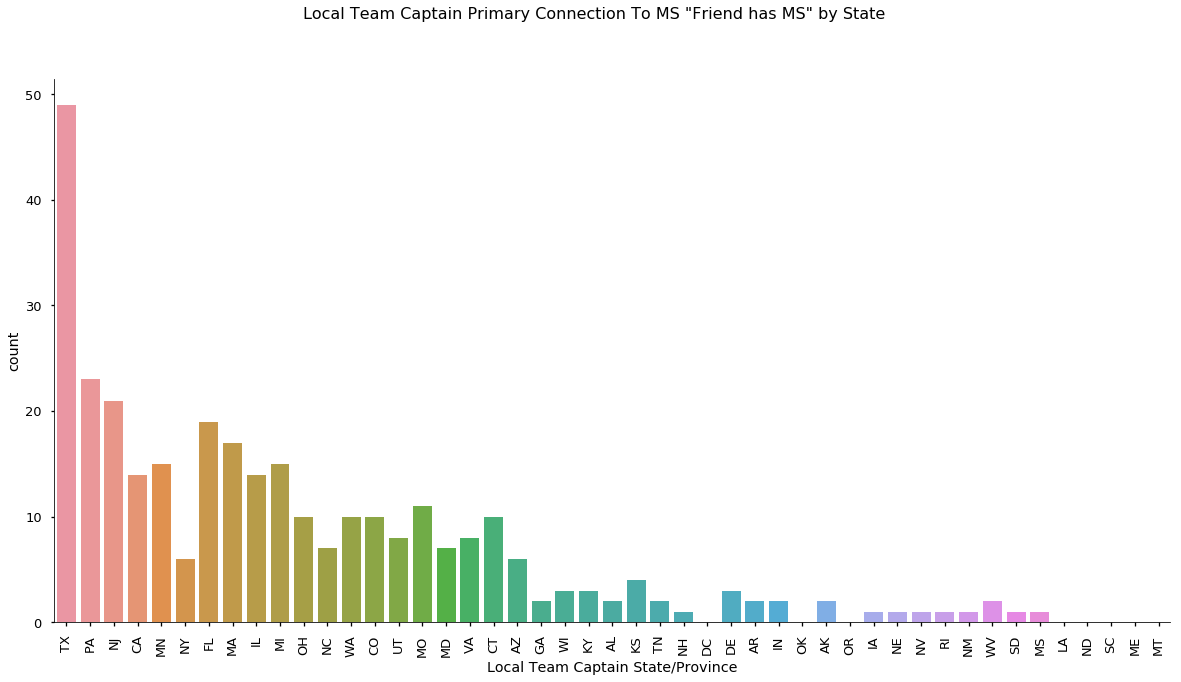

In [17]:

#sns.set_context("paper")
plt.figure(figsize=(20,10))

sns.countplot(x='Local Team Captain State/Province', data=nationalteams[nationalteams['Local Team Captain Primary Connection To MS'] == 'Friend has MS'],order = nationalteams['Local Team Captain State/Province'].value_counts().index)
plt.xticks(rotation=90)
plt.suptitle('Local Team Captain Primary Connection To MS "Friend has MS" by State', fontsize=16)

sns.despine()

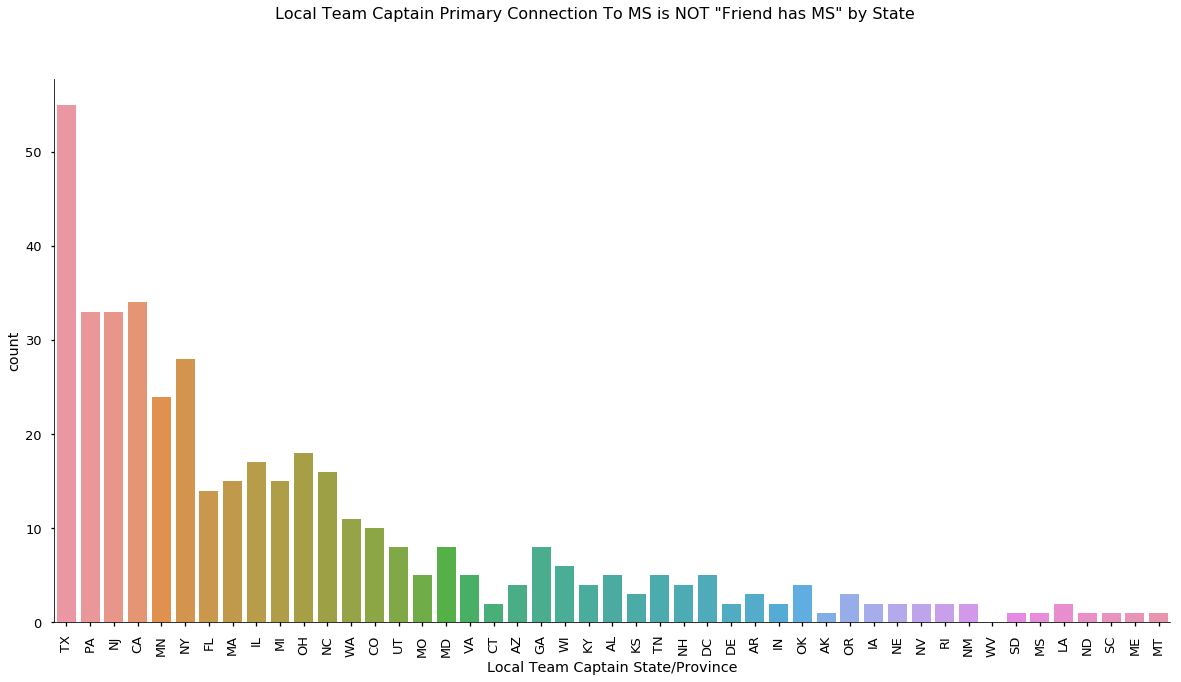

In [18]:

#sns.set_context("paper")
plt.figure(figsize=(20,10))

sns.countplot(x='Local Team Captain State/Province', data=nationalteams[nationalteams['Local Team Captain Primary Connection To MS'] != 'Friend has MS'],order = nationalteams['Local Team Captain State/Province'].value_counts().index)
plt.xticks(rotation=90)
plt.suptitle('Local Team Captain Primary Connection To MS is NOT "Friend has MS" by State', fontsize=16)

sns.despine()

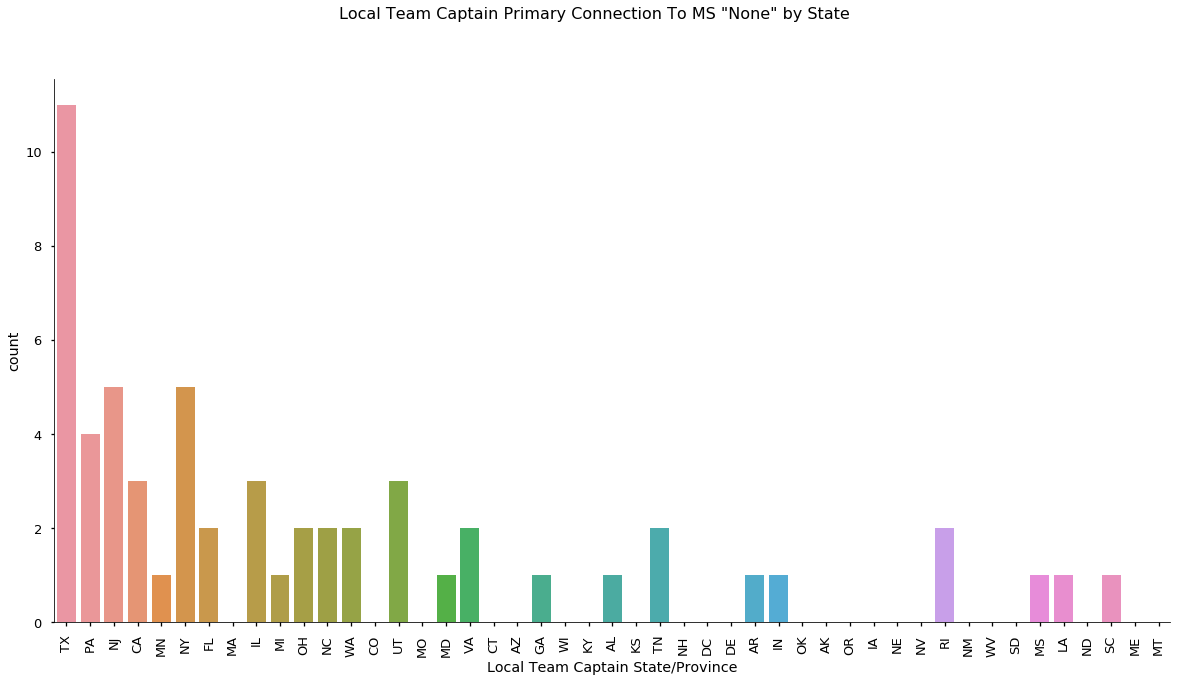

In [19]:

#sns.set_context("paper")
plt.figure(figsize=(20,10))

sns.countplot(x='Local Team Captain State/Province', data=nationalteams[nationalteams['Local Team Captain Primary Connection To MS'] == 'None'],order = nationalteams['Local Team Captain State/Province'].value_counts().index)
plt.xticks(rotation=90)
plt.suptitle('Local Team Captain Primary Connection To MS "None" by State', fontsize=16)

sns.despine()

In [20]:
#compute count of values in columns
nationalteams['Local Team Captain Email Domain'].value_counts()

gmail.com                215
yahoo.com                 85
hotmail.com               45
aol.com                   28
comcast.net               19
deloitte.com              19
msn.com                   14
salesforce.com            12
sbcglobal.net             10
kpmg.com                   9
wellsfargo.com             8
att.net                    8
pointb.com                 8
nmss.org                   7
fmr.com                    7
ey.com                     7
teamwingman.org            6
cable.comcast.com          6
us.pwc.com                 5
biogen.com                 5
teamaudreysheroes.org      5
verizon.net                5
live.com                   5
swbell.net                 5
accenture.com              5
me.com                     5
cisco.com                  5
fedex.com                  4
bm.com                     4
pepsico.com                4
                        ... 
landisgyr.com              1
bayer.com                  1
meatfight.com              1
heinztrucking.

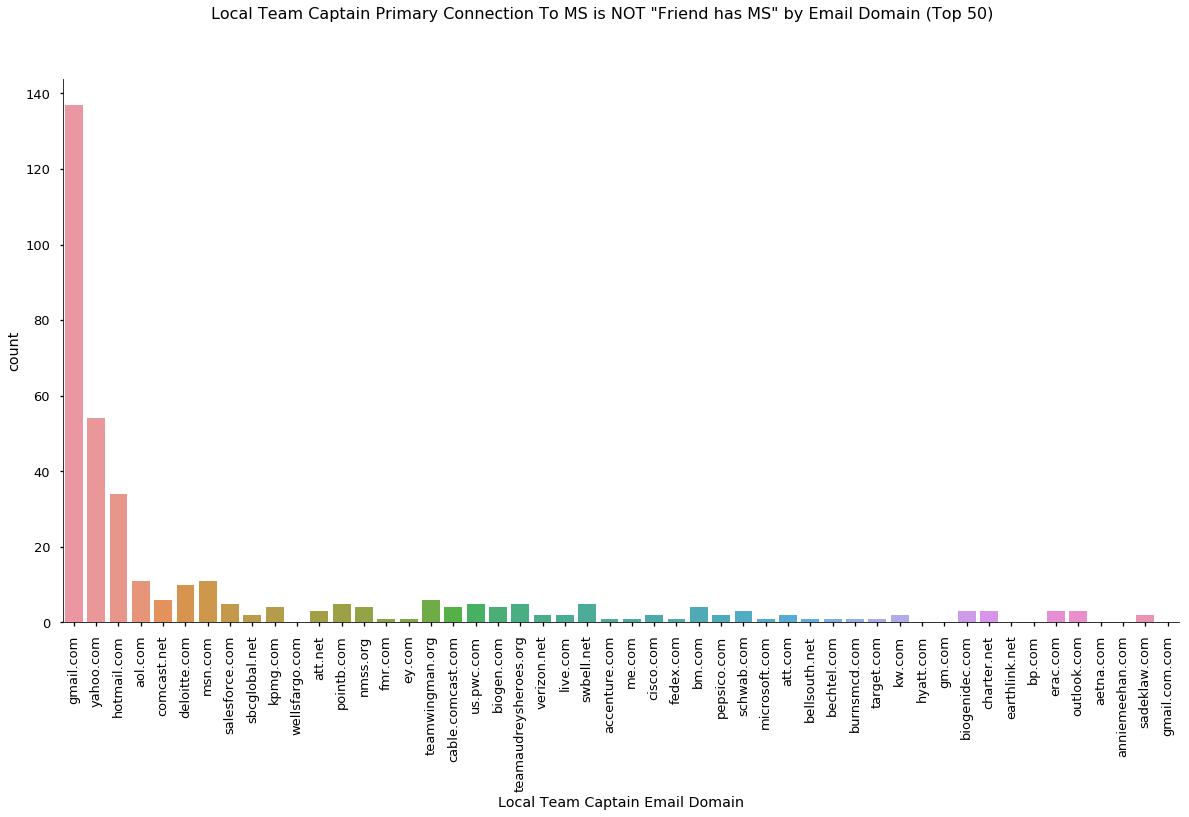

In [21]:
#sns.set_context("paper")
plt.figure(figsize=(20,10))
sns.countplot(x='Local Team Captain Email Domain', data=nationalteams[nationalteams['Local Team Captain Primary Connection To MS'] != 'Friend has MS'],order = nationalteams['Local Team Captain Email Domain'].value_counts().iloc[:50].index)
plt.xticks(rotation=90)
plt.suptitle('Local Team Captain Primary Connection To MS is NOT "Friend has MS" by Email Domain (Top 50)', fontsize=16)

sns.despine()
#plt.tight_layout()

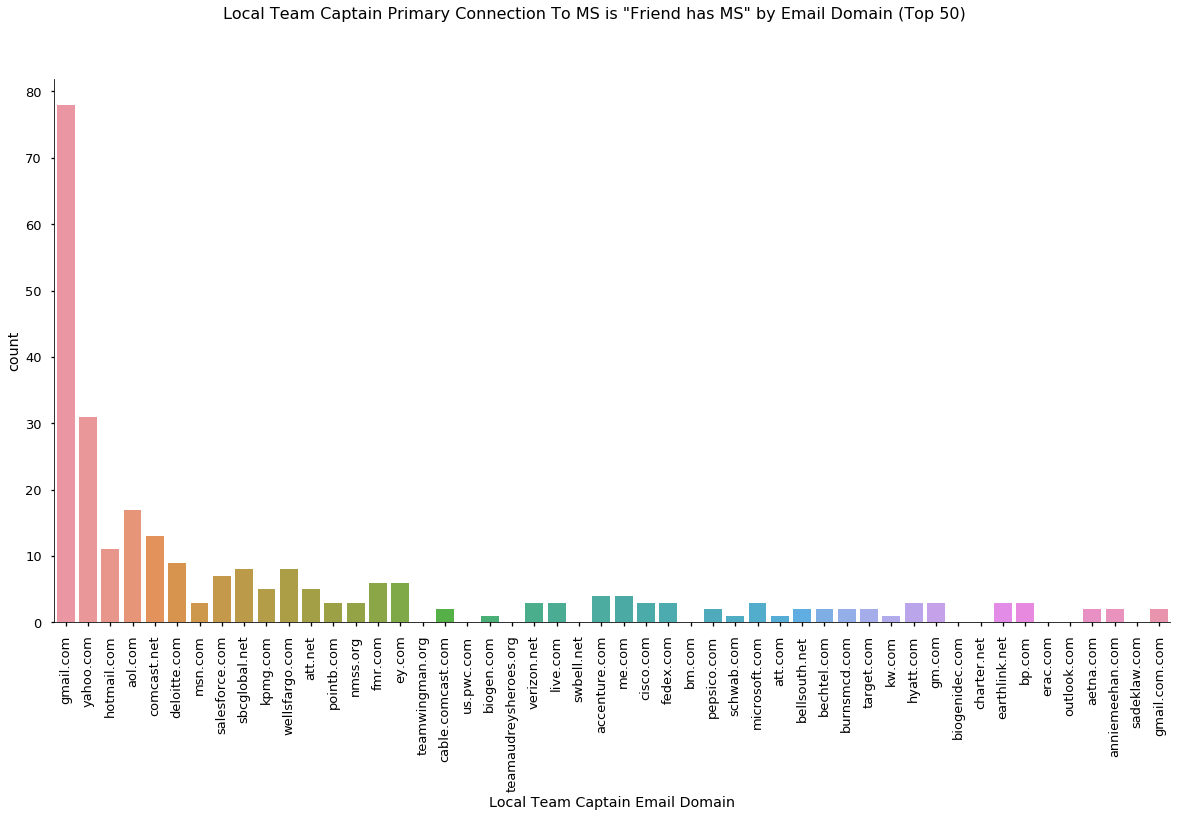

In [22]:
#sns.set_context("paper")
plt.figure(figsize=(20,10))
sns.countplot(x='Local Team Captain Email Domain', data=nationalteams[nationalteams['Local Team Captain Primary Connection To MS'] == 'Friend has MS'],order = nationalteams['Local Team Captain Email Domain'].value_counts().iloc[:50].index)
plt.xticks(rotation=90)
plt.suptitle('Local Team Captain Primary Connection To MS is "Friend has MS" by Email Domain (Top 50)', fontsize=16)


sns.despine()
#plt.tight_layout()

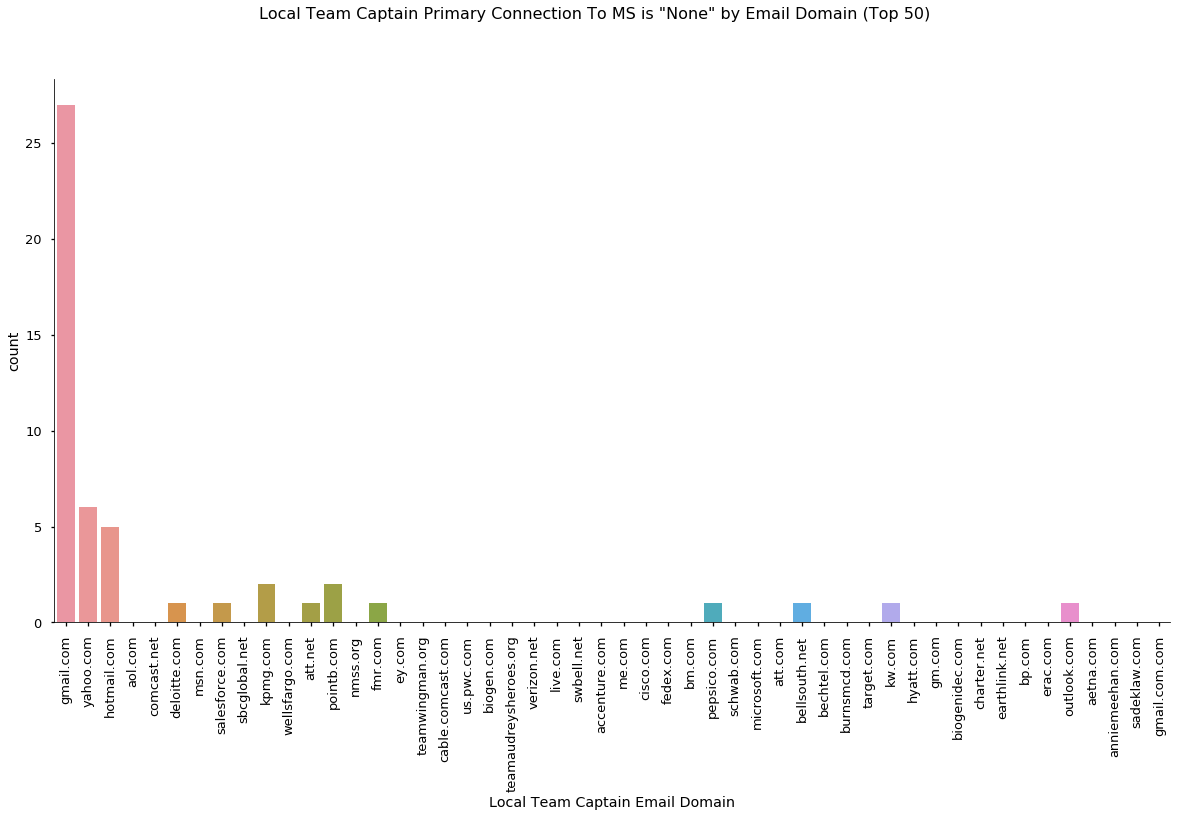

In [23]:
#sns.set_context("paper")
plt.figure(figsize=(20,10))
sns.countplot(x='Local Team Captain Email Domain', data=nationalteams[nationalteams['Local Team Captain Primary Connection To MS'] == 'None'],order = nationalteams['Local Team Captain Email Domain'].value_counts().iloc[:50].index)
plt.xticks(rotation=90)
plt.suptitle('Local Team Captain Primary Connection To MS is "None" by Email Domain (Top 50)', fontsize=16)


sns.despine()
#plt.tight_layout()

In [24]:
#compute count of values in columns
nationalteams['Local Team Captain Contact By Email OK? (Y/N)'].value_counts()

Yes    576
No     174
Name: Local Team Captain Contact By Email OK? (Y/N), dtype: int64

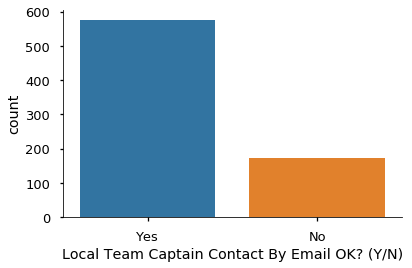

In [25]:
sns.countplot(x='Local Team Captain Contact By Email OK? (Y/N)', data=nationalteams)
sns.despine()
plt.tight_layout()

In [26]:
#compute count of values in columns
nationalteams['Revenue Raised'].value_counts()

0.00        83
50.00       16
100.00      14
300.00       9
35.00        9
1000.00      8
250.00       8
150.00       7
500.00       7
600.00       6
25.00        5
70.00        4
400.00       4
200.00       4
350.00       4
125.00       4
450.00       3
375.00       3
700.00       3
1060.00      3
1870.00      3
1145.00      2
370.00       2
1265.00      2
135.00       2
930.00       2
505.00       2
1260.00      2
2245.00      2
740.00       2
            ..
1375.00      1
5757.00      1
12281.92     1
14576.56     1
16673.60     1
66717.87     1
3714.63      1
29809.02     1
11093.35     1
27106.77     1
71127.36     1
9065.50      1
2875.00      1
4850.00      1
865.00       1
97819.62     1
3615.00      1
441.85       1
20504.00     1
21845.20     1
25598.47     1
4975.00      1
6034.99      1
23103.40     1
31908.00     1
12704.16     1
6965.00      1
2580.00      1
1361.00      1
8840.24      1
Name: Revenue Raised, Length: 579, dtype: int64

In [27]:
nationalteams['Local Team Captain State/Province'].value_counts()

TX    104
PA     56
NJ     54
CA     48
MN     39
NY     34
FL     33
MA     32
IL     31
MI     30
OH     28
NC     23
WA     21
CO     20
UT     16
MO     16
MD     15
VA     13
CT     12
AZ     10
GA     10
WI      9
KY      7
AL      7
KS      7
TN      7
NH      5
DC      5
DE      5
AR      5
IN      4
OK      4
AK      3
OR      3
IA      3
NE      3
NV      3
RI      3
NM      3
WV      2
SD      2
MS      2
LA      2
ND      1
SC      1
ME      1
MT      1
Name: Local Team Captain State/Province, dtype: int64

Text(0.5,0.98,'Local Team Captain Primary Connection to MS by Revenue raised and OK to Email')

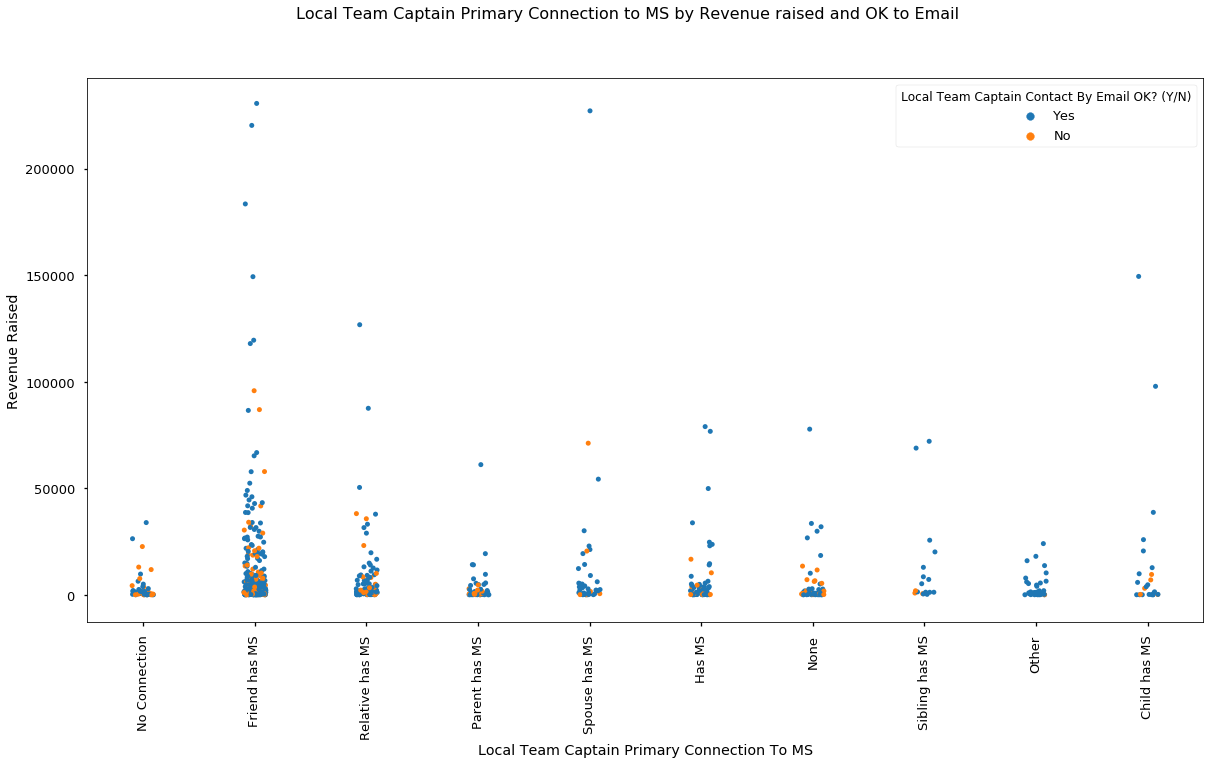

In [28]:
plt.figure(figsize=(20,10))

sns.stripplot(x="Local Team Captain Primary Connection To MS", y="Revenue Raised", hue="Local Team Captain Contact By Email OK? (Y/N)",data=nationalteams, jitter=True)
plt.xticks(rotation=90)
plt.suptitle('Local Team Captain Primary Connection to MS by Revenue raised and OK to Email', fontsize=16)



Text(0.5,0.98,'Local Team Captain State/Province by Revenue raised and Local Team Captain Primary Connection to MS')

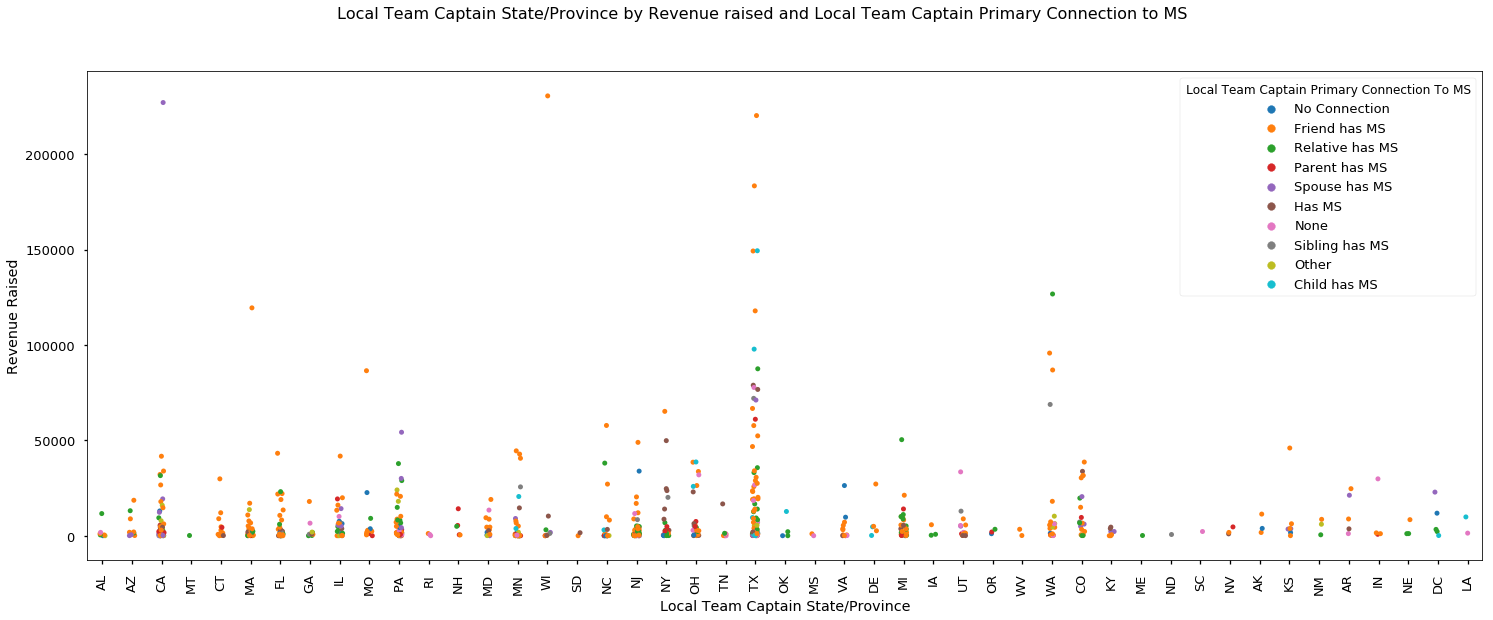

In [29]:
plt.figure(figsize=(25,9))

sns.stripplot(x="Local Team Captain State/Province", y="Revenue Raised", hue="Local Team Captain Primary Connection To MS",data=nationalteams, jitter=True)
plt.xticks(rotation=90)
plt.suptitle('Local Team Captain State/Province by Revenue raised and Local Team Captain Primary Connection to MS', fontsize=16)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),
 <a list of 47 Text xticklabel objects>)

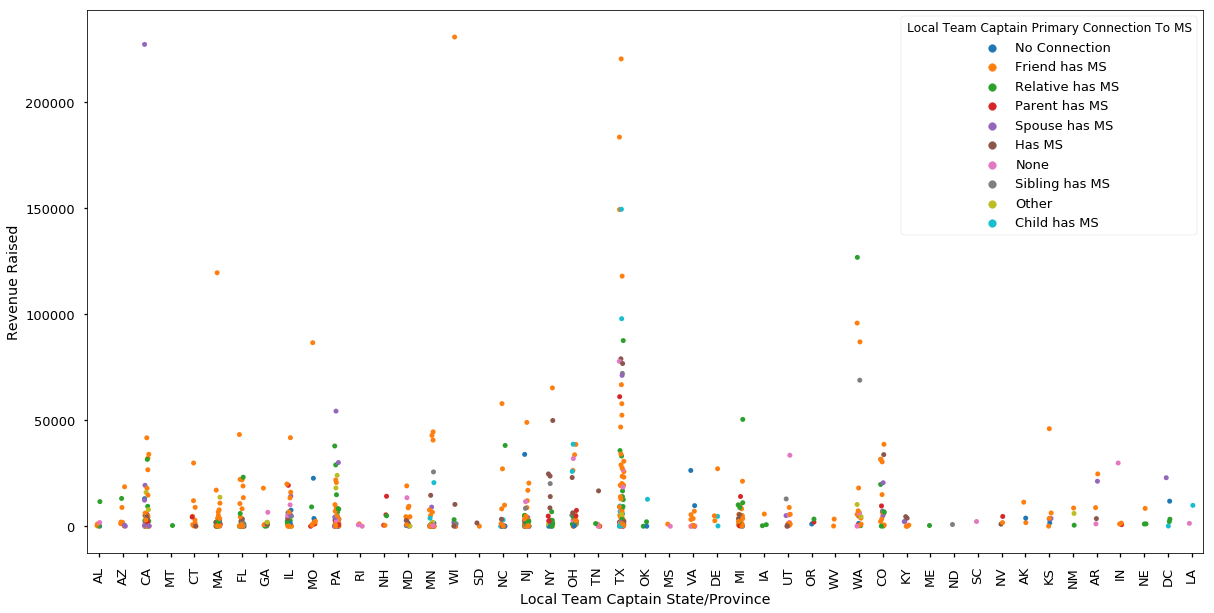

In [30]:
plt.figure(figsize=(20,10))

sns.stripplot(x="Local Team Captain State/Province", y="Revenue Raised",hue="Local Team Captain Primary Connection To MS",data=nationalteams, jitter=True)
plt.xticks(rotation=90)



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70]), <a list of 71 Text xticklabel objects>)

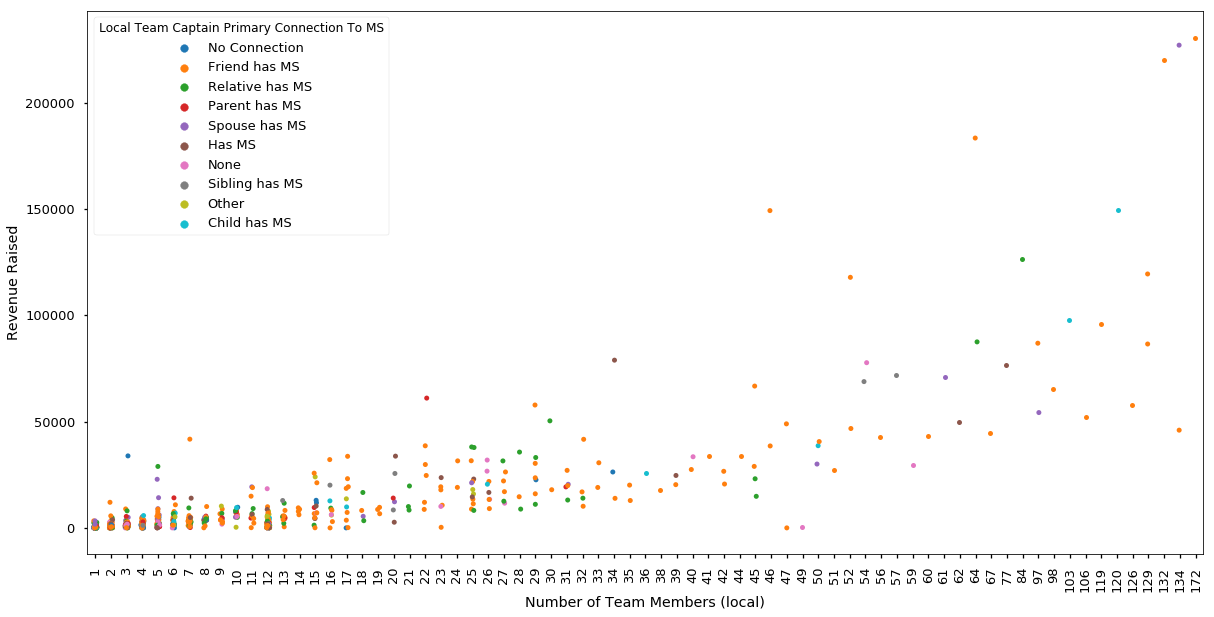

In [31]:
plt.figure(figsize=(20,10))

sns.stripplot(x="Number of Team Members (local)", y="Revenue Raised",hue="Local Team Captain Primary Connection To MS",data=nationalteams, jitter=True)
plt.xticks(rotation=90)

Text(0,0.5,'Revenue Raised')

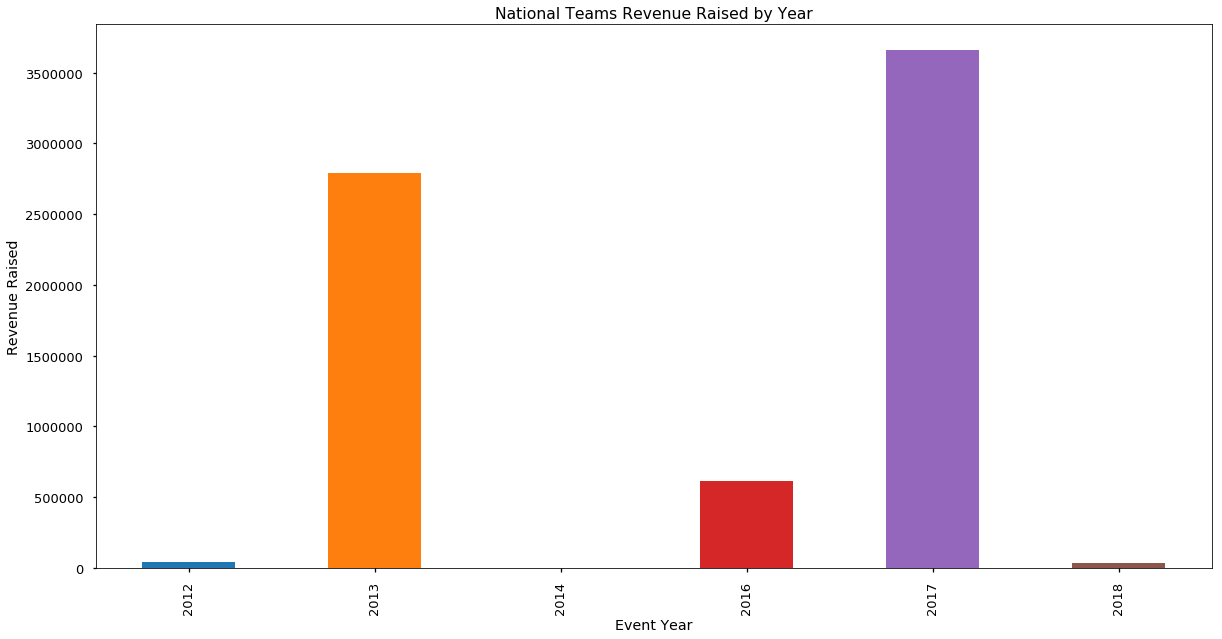

In [32]:
# sum of total gifts by month and year

plt.figure(figsize=(20,10))
plot_data =nationalteams.groupby(['Event Year'])['Revenue Raised'].sum()
plot_data.plot(kind='bar')
plt.title("National Teams Revenue Raised by Year")
plt.ylabel("Revenue Raised")

Text(0,0.5,'Revenue Raised')

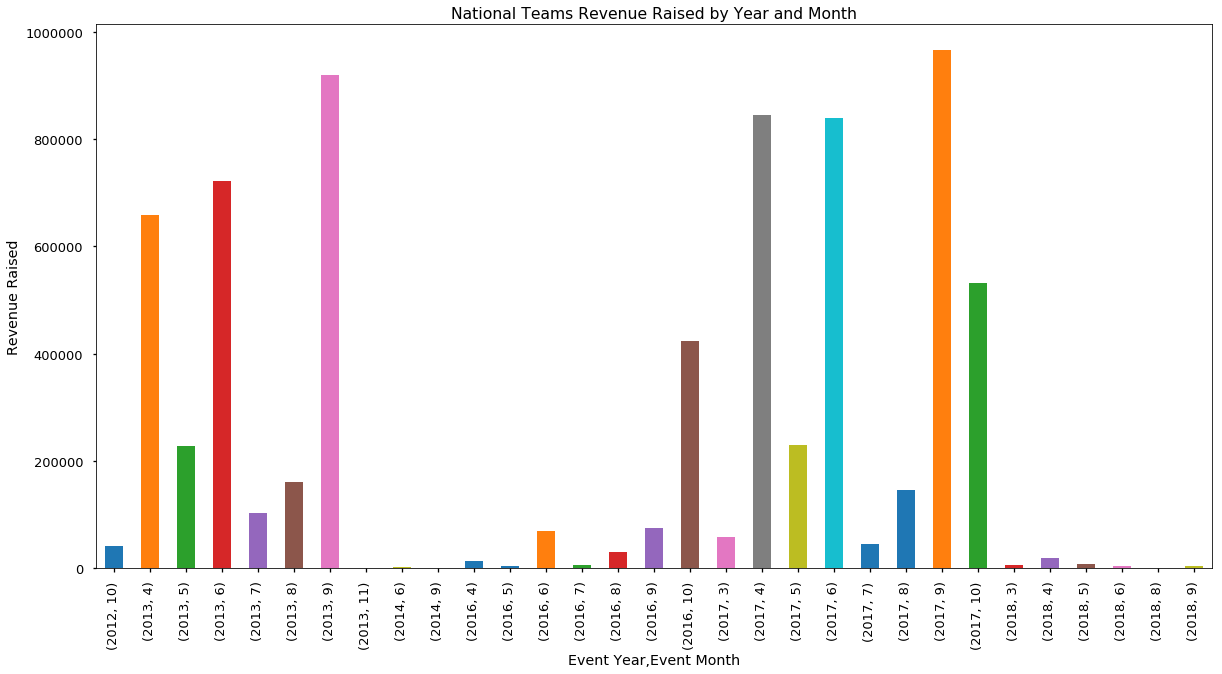

In [33]:
# sum of total gifts by month and year

plt.figure(figsize=(20,10))
plot_data =nationalteams.groupby(['Event Year','Event Month'])['Revenue Raised'].sum()
plot_data.plot(kind='bar')
plt.title("National Teams Revenue Raised by Year and Month")
plt.ylabel("Revenue Raised")

Text(0,0.5,'Revenue Raised')

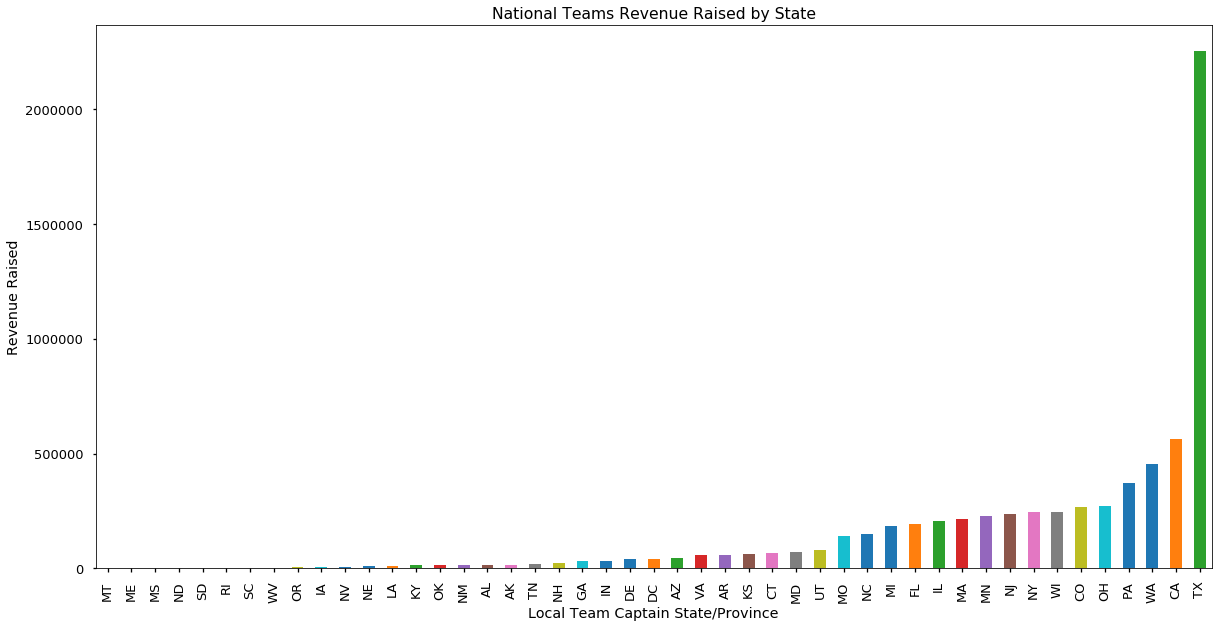

In [34]:

# What total gifts for all states
plt.figure(figsize=(20,10))
plot_data =nationalteams.groupby('Local Team Captain State/Province')['Revenue Raised'].sum()
plot_data.sort_values()[-50:].plot(kind='bar')
plt.title("National Teams Revenue Raised by State")
plt.ylabel("Revenue Raised")

In [35]:
nationalteams.groupby('Local Team Captain State/Province')['Revenue Raised'].sum()

Local Team Captain State/Province
AK      16862.64
AL      15255.00
AR      59335.53
AZ      47630.26
CA     562691.09
CO     268800.42
CT      65809.99
DC      40271.50
DE      39407.14
FL     192501.73
GA      31175.00
IA       6747.00
IL     207404.29
IN      33107.00
KS      64796.60
KY      13220.00
LA      11200.00
MA     214485.10
MD      69954.00
ME        505.00
MI     185296.32
MN     229862.83
MO     139631.11
MS       1000.00
MT        380.00
NC     149613.10
ND       1155.00
NE      10604.00
NH      25356.01
NJ     235311.22
NM      15084.20
NV       7308.00
NY     245359.49
OH     272444.02
OK      14809.16
OR       6405.00
PA     370261.91
RI       1770.00
SC       2675.00
SD       1560.00
TN      19873.60
TX    2256020.09
UT      78683.72
VA      56460.00
WA     453207.54
WI     247361.16
WV       3470.00
Name: Revenue Raised, dtype: float64

In [36]:
#How many events per year
nationalteams['Event Year'].value_counts()

2017    319
2013    248
2016    143
2018     79
2012     19
2014      2
Name: Event Year, dtype: int64

In [37]:
# How many events are there for each month?
nationalteams['Event Month'].value_counts()

9     239
6     220
10    115
5      73
8      64
4      50
7      28
3      20
11      1
Name: Event Month, dtype: int64

In [38]:
# Get the sum of the total revenue per month
nationalteams.groupby('Event Month')['Revenue Raised'].sum()



Event Month
3       61125.43
4     1534043.70
5      467148.64
6     1634641.92
7      151520.86
8      334173.25
9     1963260.90
10     995502.77
11        505.00
Name: Revenue Raised, dtype: float64

In [39]:
# Get the number of dates / events in each month
nationalteams.groupby('Event Month')['Event Start Date'].count()

Event Month
3      20
4      50
5      73
6     220
7      28
8      64
9     239
10    115
11      1
Name: Event Start Date, dtype: int64

In [40]:
# Total Gifts by month, year and state
nationalteams.groupby(['Event Month','Event Year','Local Team Captain State/Province'])['Revenue Raised'].sum()

Event Month  Event Year  Local Team Captain State/Province
3            2017        AZ                                    23182.05
                         CA                                     7959.88
                         FL                                    20193.00
                         IL                                     1361.00
             2018        AZ                                     3505.00
                         FL                                      985.00
4            2013        CA                                        0.00
                         FL                                    64550.10
                         OR                                     1060.00
                         TX                                   593714.48
             2016        MA                                    10350.00
                         TX                                     1685.00
             2017        TX                                   845124.12
     

In [41]:
# Total Gifts by month, year and state
nationalteams.groupby(['Local Team Captain State/Province','Event Year','Event Month'])['Revenue Raised'].sum()

Local Team Captain State/Province  Event Year  Event Month
AK                                 2013        9                3826.39
                                   2017        5               11336.25
                                               8                1700.00
AL                                 2013        9                1085.00
                                   2016        9                 425.00
                                               10               1745.00
                                   2017        9               12000.00
AR                                 2013        9               12369.00
                                   2017        9               46966.53
AZ                                 2012        10                 50.00
                                   2013        5               20388.21
                                               11                505.00
                                   2017        3               23182.05
     

Text(0,0.5,'Revenue Raised')

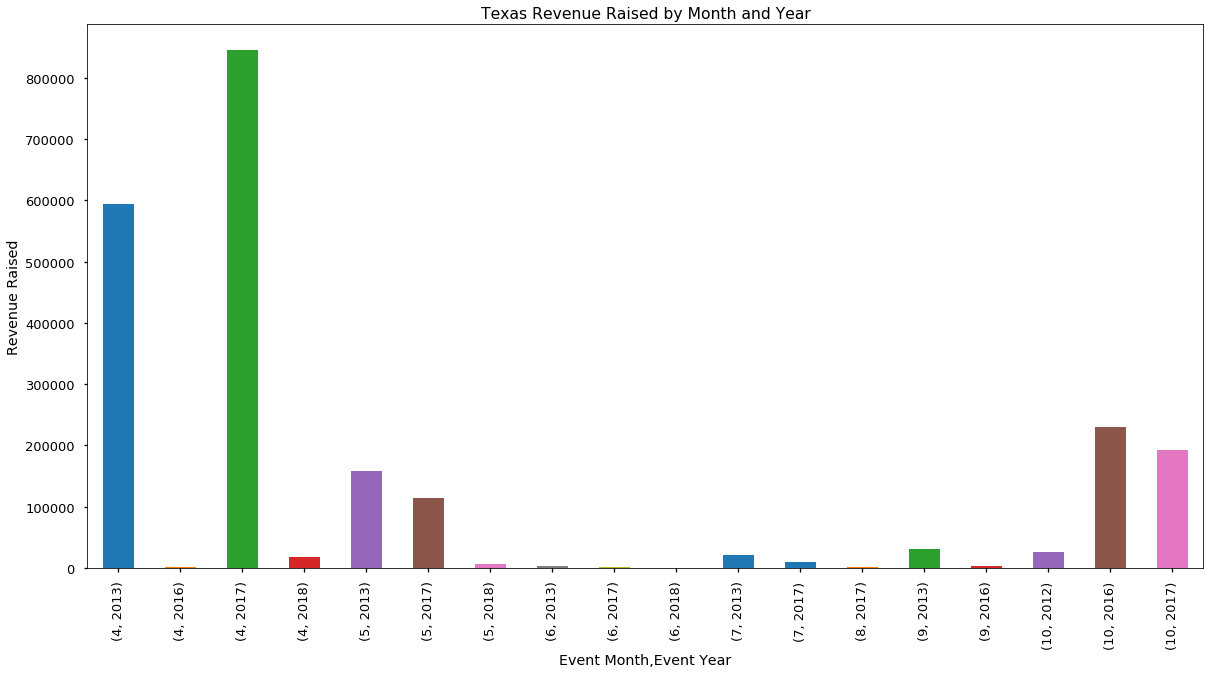

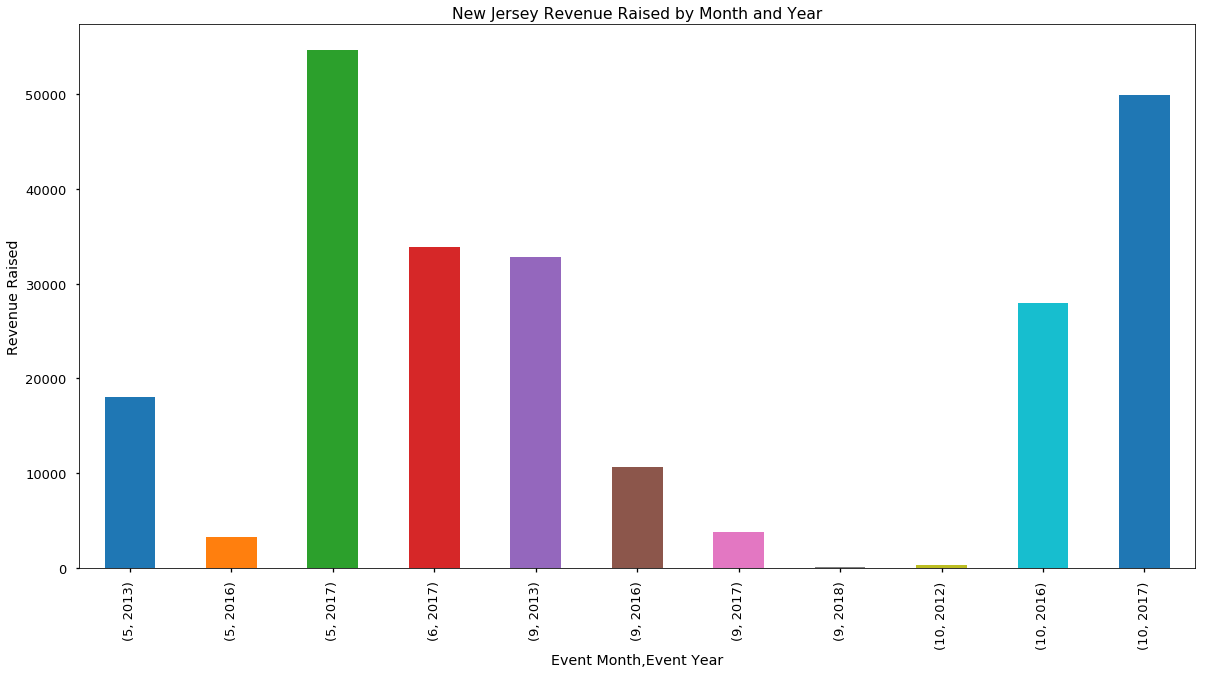

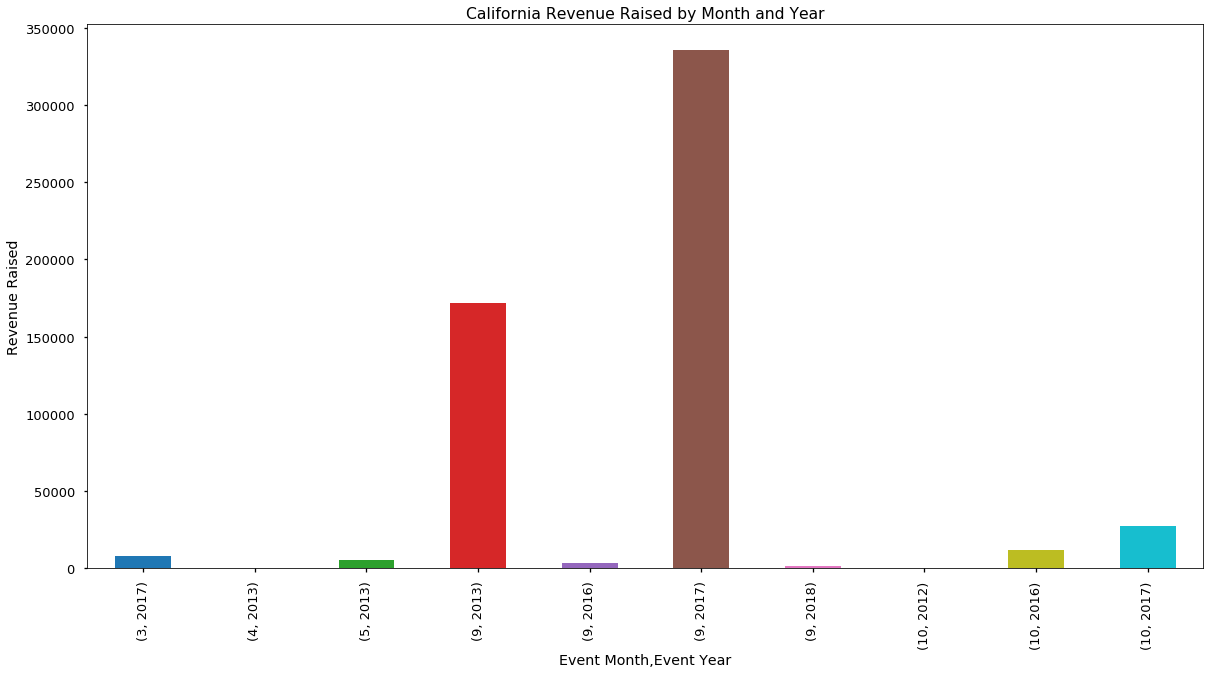

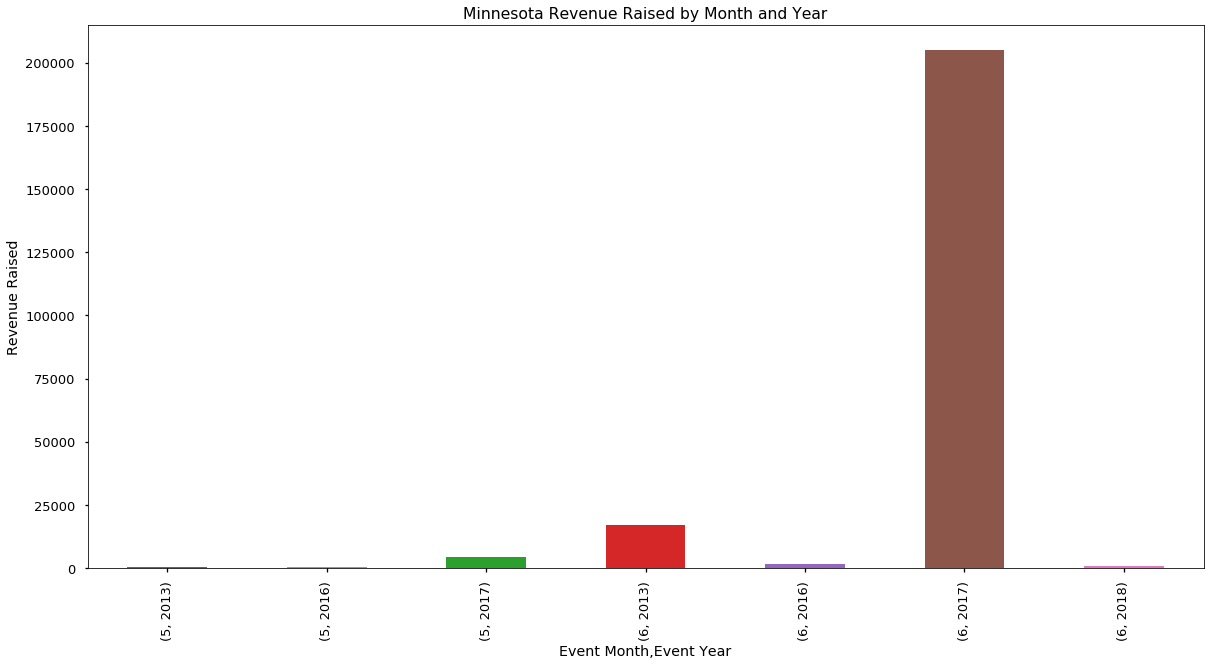

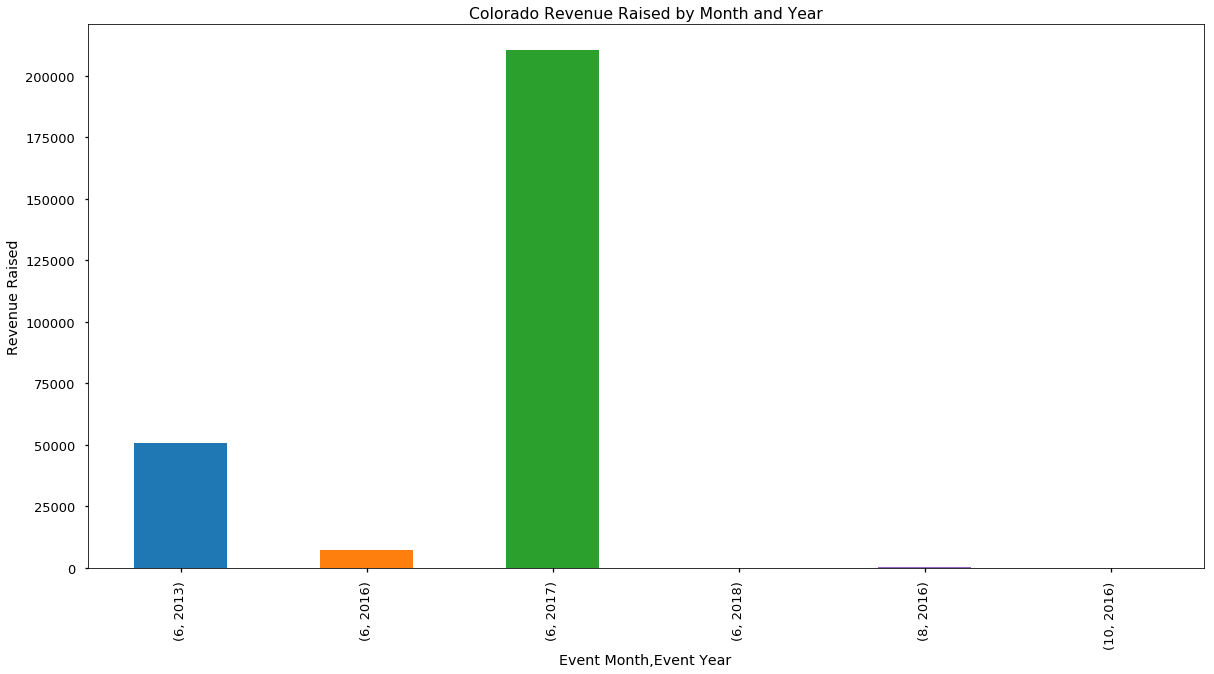

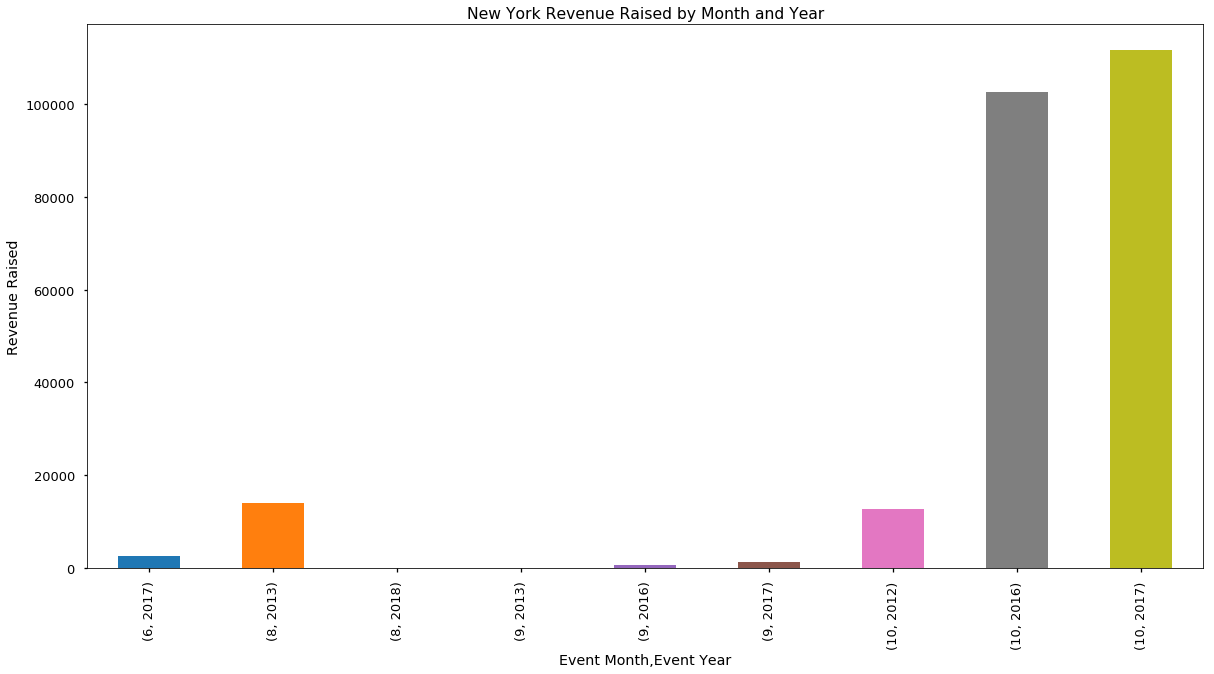

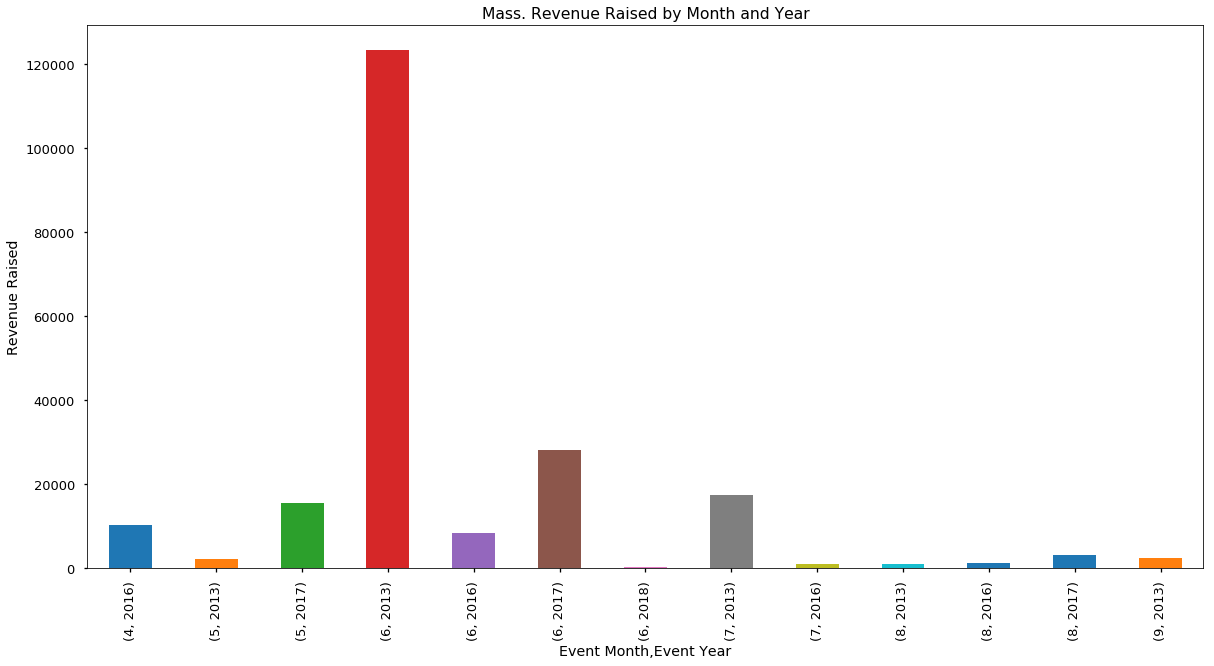

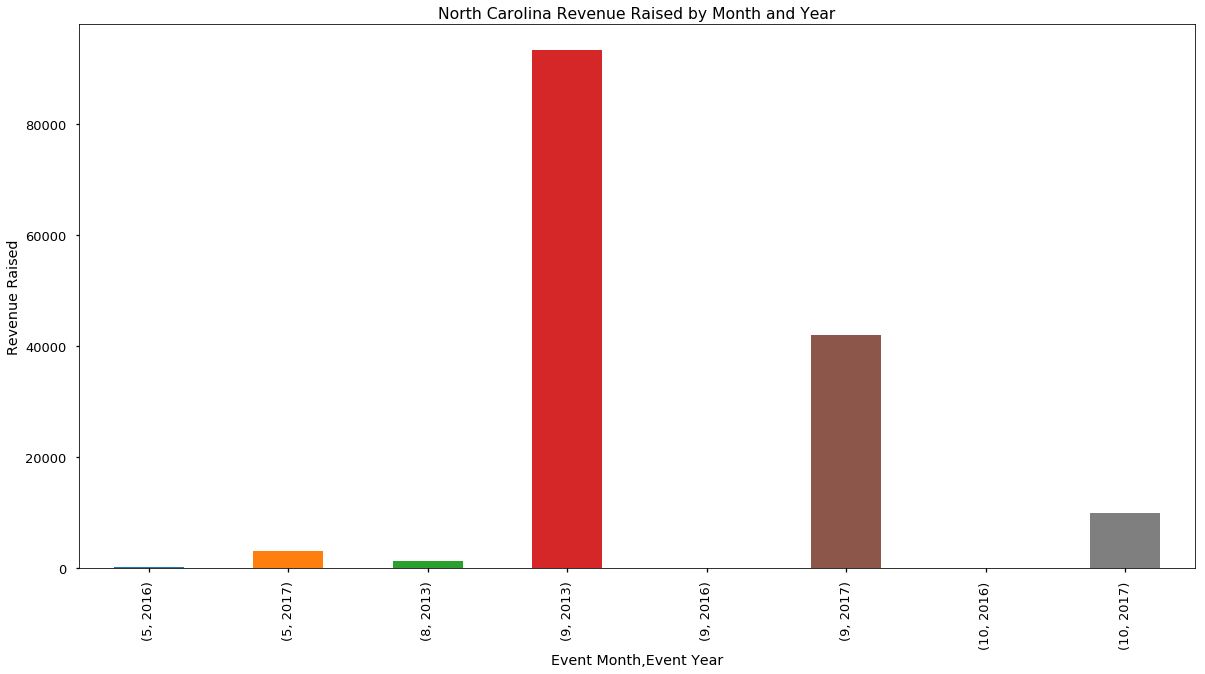

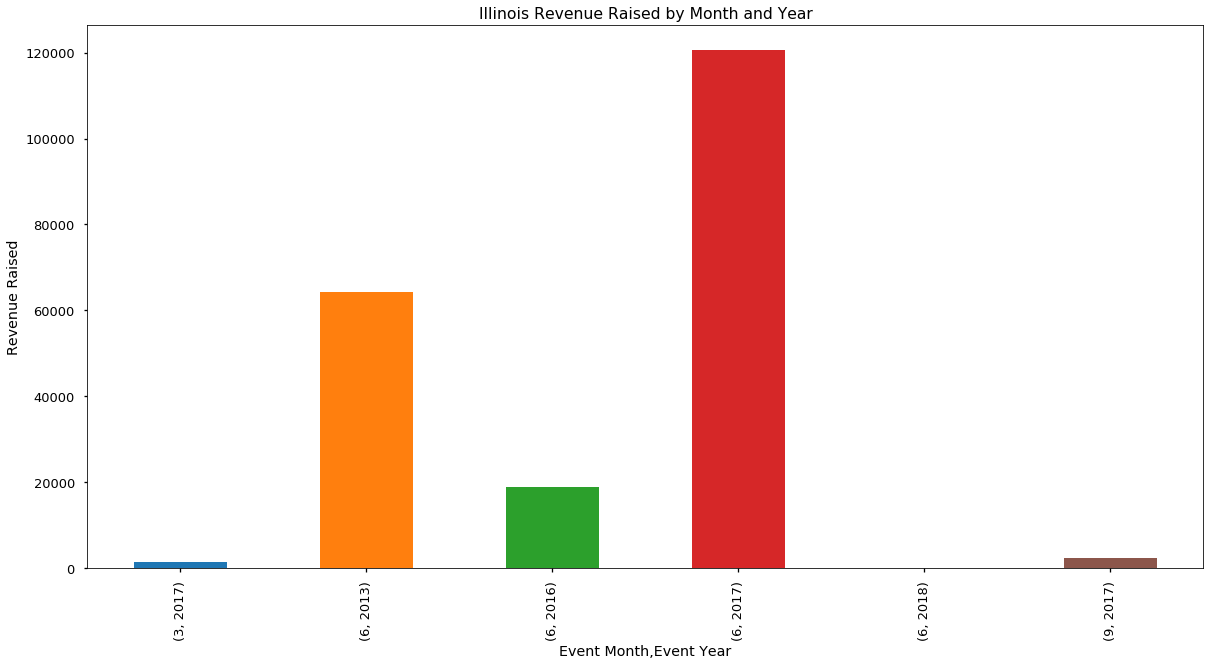

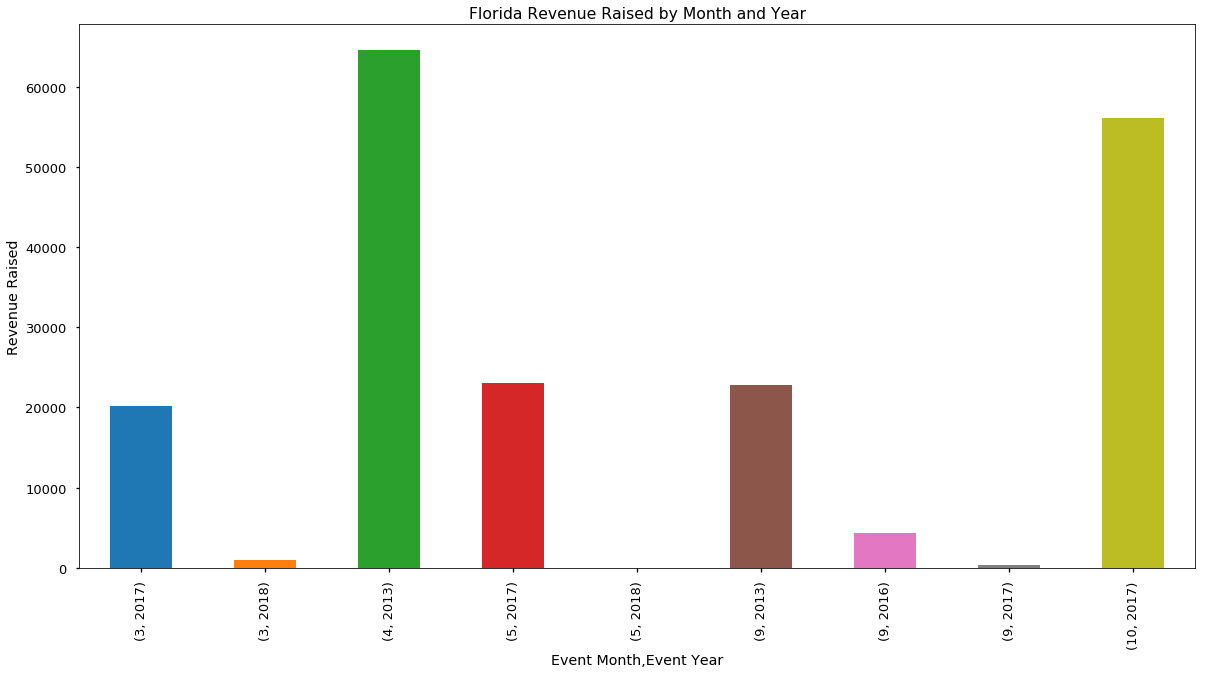

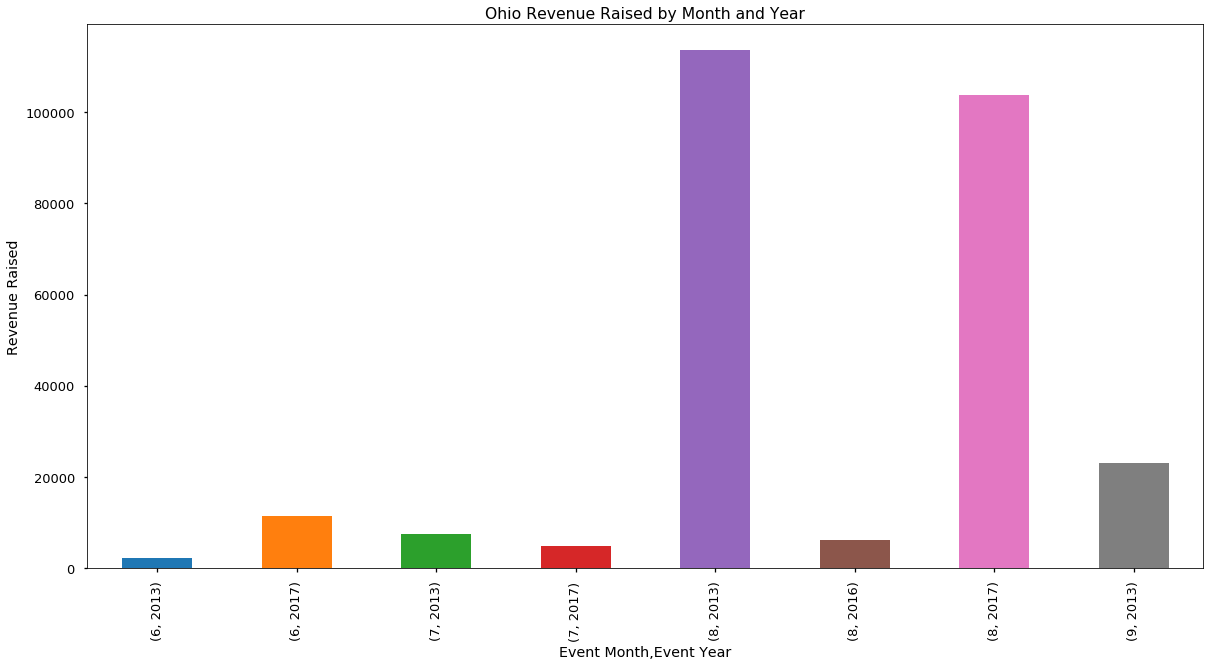

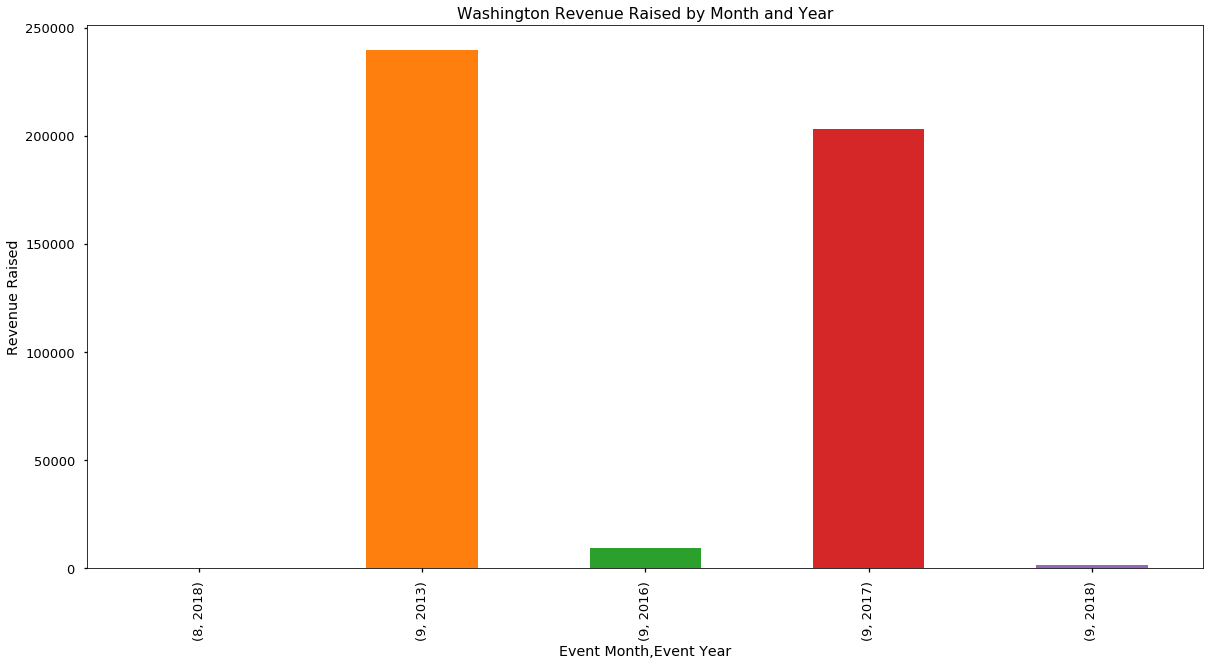

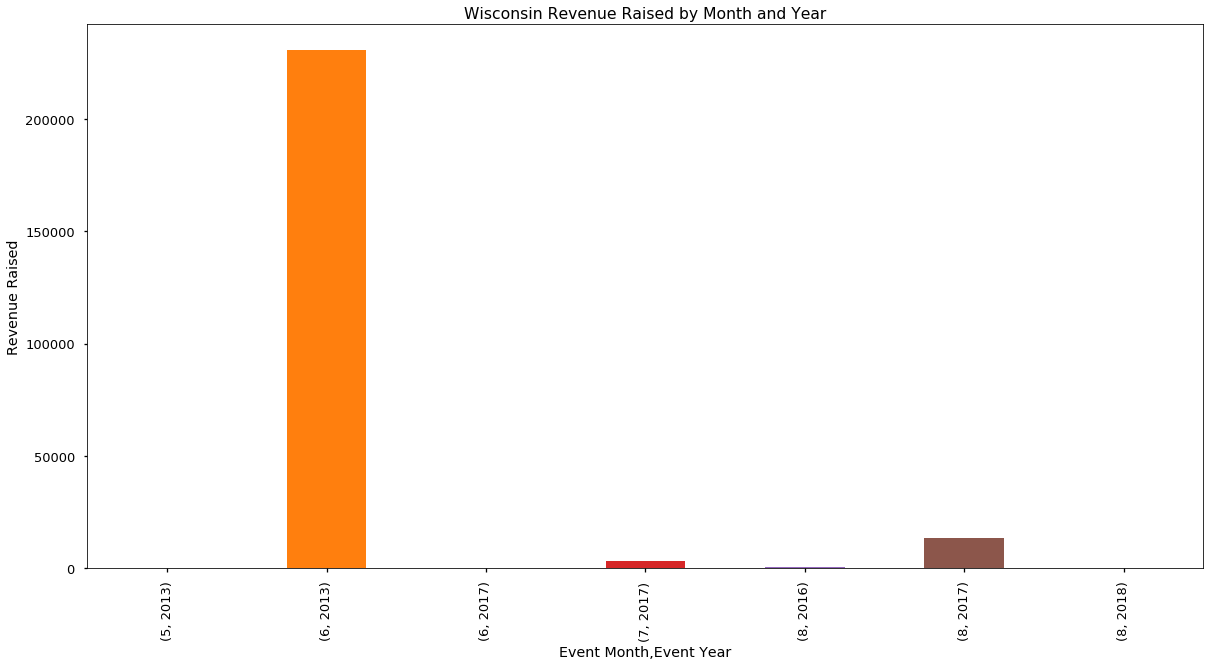

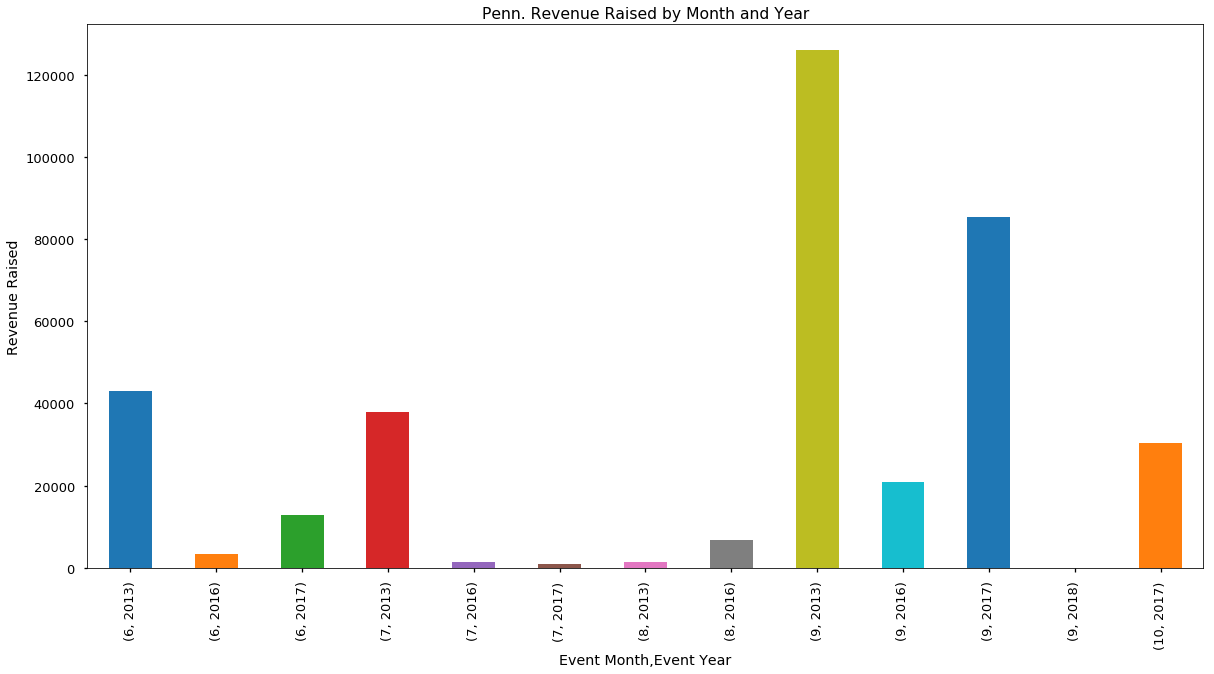

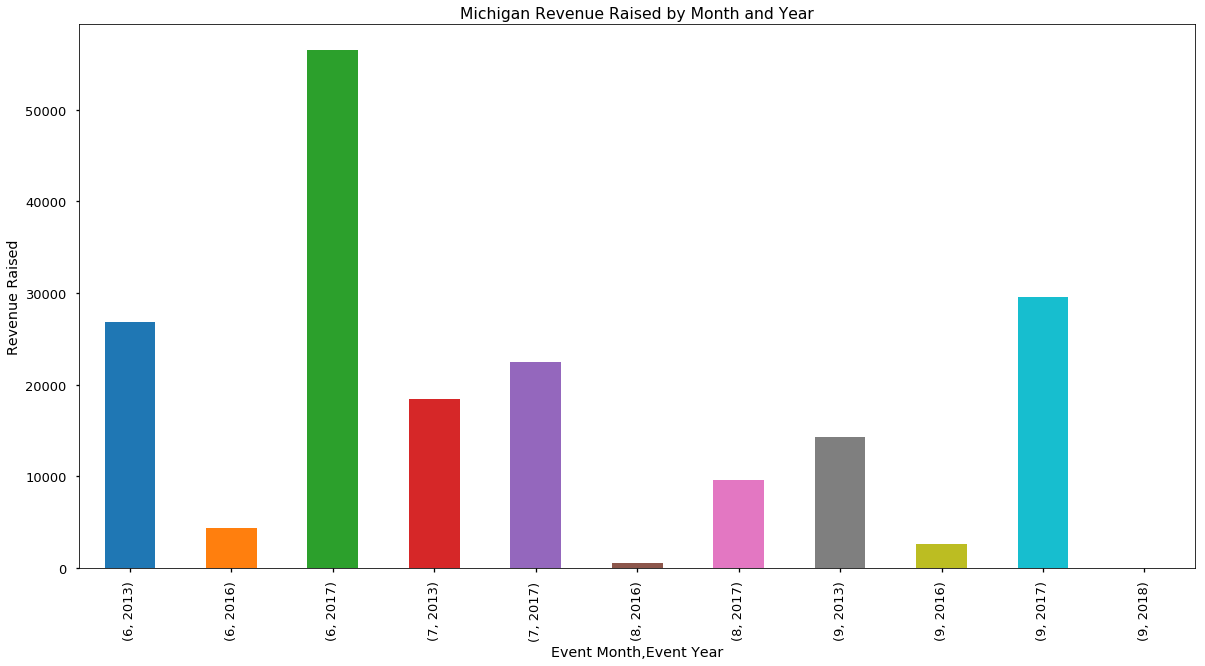

In [42]:
# sum of total gifts by month and year top 15 Local Team Captain State/Provinces

plt.figure(figsize=(20,10))
plot_data =nationalteams[nationalteams['Local Team Captain State/Province'] == 'TX'].groupby(['Event Month', 'Event Year'])['Revenue Raised'].sum()
plot_data.plot(kind='bar')
plt.title("Texas Revenue Raised by Month and Year")
plt.ylabel("Revenue Raised")

plt.figure(figsize=(20,10))
plot_data =nationalteams[nationalteams['Local Team Captain State/Province'] == 'NJ'].groupby(['Event Month', 'Event Year'])['Revenue Raised'].sum()
plot_data.plot(kind='bar')
plt.title("New Jersey Revenue Raised by Month and Year")
plt.ylabel("Revenue Raised")

plt.figure(figsize=(20,10))
plot_data =nationalteams[nationalteams['Local Team Captain State/Province'] == 'CA'].groupby(['Event Month', 'Event Year'])['Revenue Raised'].sum()
plot_data.plot(kind='bar')
plt.title("California Revenue Raised by Month and Year")
plt.ylabel("Revenue Raised")

plt.figure(figsize=(20,10))
plot_data =nationalteams[nationalteams['Local Team Captain State/Province'] == 'MN'].groupby(['Event Month', 'Event Year'])['Revenue Raised'].sum()
plot_data.plot(kind='bar')
plt.title("Minnesota Revenue Raised by Month and Year")
plt.ylabel("Revenue Raised")

plt.figure(figsize=(20,10))
plot_data =nationalteams[nationalteams['Local Team Captain State/Province'] == 'CO'].groupby(['Event Month', 'Event Year'])['Revenue Raised'].sum()
plot_data.plot(kind='bar')
plt.title("Colorado Revenue Raised by Month and Year")
plt.ylabel("Revenue Raised")

plt.figure(figsize=(20,10))
plot_data =nationalteams[nationalteams['Local Team Captain State/Province'] == 'NY'].groupby(['Event Month', 'Event Year'])['Revenue Raised'].sum()
plot_data.plot(kind='bar')
plt.title("New York Revenue Raised by Month and Year")
plt.ylabel("Revenue Raised")


plt.figure(figsize=(20,10))
plot_data =nationalteams[nationalteams['Local Team Captain State/Province'] == 'MA'].groupby(['Event Month', 'Event Year'])['Revenue Raised'].sum()
plot_data.plot(kind='bar')
plt.title("Mass. Revenue Raised by Month and Year")
plt.ylabel("Revenue Raised")

plt.figure(figsize=(20,10))
plot_data =nationalteams[nationalteams['Local Team Captain State/Province'] == 'NC'].groupby(['Event Month', 'Event Year'])['Revenue Raised'].sum()
plot_data.plot(kind='bar')
plt.title("North Carolina Revenue Raised by Month and Year")
plt.ylabel("Revenue Raised")

plt.figure(figsize=(20,10))
plot_data =nationalteams[nationalteams['Local Team Captain State/Province'] == 'IL'].groupby(['Event Month', 'Event Year'])['Revenue Raised'].sum()
plot_data.plot(kind='bar')
plt.title("Illinois Revenue Raised by Month and Year")
plt.ylabel("Revenue Raised")

plt.figure(figsize=(20,10))
plot_data =nationalteams[nationalteams['Local Team Captain State/Province'] == 'FL'].groupby(['Event Month', 'Event Year'])['Revenue Raised'].sum()
plot_data.plot(kind='bar')
plt.title("Florida Revenue Raised by Month and Year")
plt.ylabel("Revenue Raised")

plt.figure(figsize=(20,10))
plot_data =nationalteams[nationalteams['Local Team Captain State/Province'] == 'OH'].groupby(['Event Month', 'Event Year'])['Revenue Raised'].sum()
plot_data.plot(kind='bar')
plt.title("Ohio Revenue Raised by Month and Year")
plt.ylabel("Revenue Raised")

plt.figure(figsize=(20,10))
plot_data =nationalteams[nationalteams['Local Team Captain State/Province'] == 'WA'].groupby(['Event Month', 'Event Year'])['Revenue Raised'].sum()
plot_data.plot(kind='bar')
plt.title("Washington Revenue Raised by Month and Year")
plt.ylabel("Revenue Raised")

plt.figure(figsize=(20,10))
plot_data =nationalteams[nationalteams['Local Team Captain State/Province'] == 'WI'].groupby(['Event Month', 'Event Year'])['Revenue Raised'].sum()
plot_data.plot(kind='bar')
plt.title("Wisconsin Revenue Raised by Month and Year")
plt.ylabel("Revenue Raised")

plt.figure(figsize=(20,10))
plot_data =nationalteams[nationalteams['Local Team Captain State/Province'] == 'PA'].groupby(['Event Month', 'Event Year'])['Revenue Raised'].sum()
plot_data.plot(kind='bar')
plt.title("Penn. Revenue Raised by Month and Year")
plt.ylabel("Revenue Raised")


plt.figure(figsize=(20,10))
plot_data =nationalteams[nationalteams['Local Team Captain State/Province'] == 'MI'].groupby(['Event Month', 'Event Year'])['Revenue Raised'].sum()
plot_data.plot(kind='bar')
plt.title("Michigan Revenue Raised by Month and Year")
plt.ylabel("Revenue Raised")

# Describing Data

In [5]:
dummy = pd.get_dummies(nationalteams['Local Team Captain Primary Connection To MS'])
nationalteamsd = pd.concat([nationalteams, dummy],axis=1)
nationalteamsd.head()


,National Team Name,Event Chapter,Event Category,Event Type,Local Team Name,Event Name,Event Start Date,Event Month,Event Day,Event Year,...,Child has MS,Friend has MS,Has MS,No Connection,None,Other,Parent has MS,Relative has MS,Sibling has MS,Spouse has MS
0,NaN,ALC,Bike,MS 150 (2 Day Bike),Mobilians on Bikes,ALC 2016 Bike MS: Tour de Beach,2016-09-17,9,17,2016,...,0,0,0,1,0,0,0,0,0,0
1,American Express Bike Team,AZA,Bike,MS 150 (2 Day Bike),Ride For Life,AZA 2018 Bike MS: Arizona,2018-03-24,3,24,2018,...,0,1,0,0,0,0,0,0,0,0
2,Point B Bike Team,AZA,Bike,MS 150 (2 Day Bike),Point B Phoenix,AZA 2018 Bike MS: Arizona,2018-03-24,3,24,2018,...,0,0,0,0,0,0,0,1,0,0
3,Progressive Bike Team,AZA,Bike,MS 150 (2 Day Bike),Team Progressive,AZA 2018 Bike MS: Arizona,2018-03-24,3,24,2018,...,0,1,0,0,0,0,0,0,0,0
4,NaN,CAL,Bike,MS 150 (2 Day Bike),AV Road Crew,CAL 2017 Bike MS: Coastal Challenge,2017-03-25,3,25,2017,...,0,0,0,0,0,0,0,1,0,0


In [6]:
dummy = pd.get_dummies(nationalteams['Local Team Captain State/Province'])
nationalteamsd = pd.concat([nationalteamsd, dummy],axis=1)
nationalteamsd.head()

,National Team Name,Event Chapter,Event Category,Event Type,Local Team Name,Event Name,Event Start Date,Event Month,Event Day,Event Year,...,RI,SC,SD,TN,TX,UT,VA,WA,WI,WV
0,NaN,ALC,Bike,MS 150 (2 Day Bike),Mobilians on Bikes,ALC 2016 Bike MS: Tour de Beach,2016-09-17,9,17,2016,...,0,0,0,0,0,0,0,0,0,0
1,American Express Bike Team,AZA,Bike,MS 150 (2 Day Bike),Ride For Life,AZA 2018 Bike MS: Arizona,2018-03-24,3,24,2018,...,0,0,0,0,0,0,0,0,0,0
2,Point B Bike Team,AZA,Bike,MS 150 (2 Day Bike),Point B Phoenix,AZA 2018 Bike MS: Arizona,2018-03-24,3,24,2018,...,0,0,0,0,0,0,0,0,0,0
3,Progressive Bike Team,AZA,Bike,MS 150 (2 Day Bike),Team Progressive,AZA 2018 Bike MS: Arizona,2018-03-24,3,24,2018,...,0,0,0,0,0,0,0,0,0,0
4,NaN,CAL,Bike,MS 150 (2 Day Bike),AV Road Crew,CAL 2017 Bike MS: Coastal Challenge,2017-03-25,3,25,2017,...,0,0,0,0,0,0,0,0,0,0


In [7]:
dummy = pd.get_dummies(nationalteams['Local Team Captain Contact By Mail OK? (Y/N)'])
nationalteamsd = pd.concat([nationalteamsd, dummy],axis=1)
nationalteamsd.head()

,National Team Name,Event Chapter,Event Category,Event Type,Local Team Name,Event Name,Event Start Date,Event Month,Event Day,Event Year,...,SD,TN,TX,UT,VA,WA,WI,WV,No,Yes
0,NaN,ALC,Bike,MS 150 (2 Day Bike),Mobilians on Bikes,ALC 2016 Bike MS: Tour de Beach,2016-09-17,9,17,2016,...,0,0,0,0,0,0,0,0,1,0
1,American Express Bike Team,AZA,Bike,MS 150 (2 Day Bike),Ride For Life,AZA 2018 Bike MS: Arizona,2018-03-24,3,24,2018,...,0,0,0,0,0,0,0,0,0,1
2,Point B Bike Team,AZA,Bike,MS 150 (2 Day Bike),Point B Phoenix,AZA 2018 Bike MS: Arizona,2018-03-24,3,24,2018,...,0,0,0,0,0,0,0,0,1,0
3,Progressive Bike Team,AZA,Bike,MS 150 (2 Day Bike),Team Progressive,AZA 2018 Bike MS: Arizona,2018-03-24,3,24,2018,...,0,0,0,0,0,0,0,0,0,1
4,NaN,CAL,Bike,MS 150 (2 Day Bike),AV Road Crew,CAL 2017 Bike MS: Coastal Challenge,2017-03-25,3,25,2017,...,0,0,0,0,0,0,0,0,0,1


In [8]:
nationalteamsd=nationalteamsd.fillna(0)
nationalteamsd

,National Team Name,Event Chapter,Event Category,Event Type,Local Team Name,Event Name,Event Start Date,Event Month,Event Day,Event Year,...,SD,TN,TX,UT,VA,WA,WI,WV,No,Yes
0,0,ALC,Bike,MS 150 (2 Day Bike),Mobilians on Bikes,ALC 2016 Bike MS: Tour de Beach,2016-09-17,9,17,2016,...,0,0,0,0,0,0,0,0,1,0
1,American Express Bike Team,AZA,Bike,MS 150 (2 Day Bike),Ride For Life,AZA 2018 Bike MS: Arizona,2018-03-24,3,24,2018,...,0,0,0,0,0,0,0,0,0,1
2,Point B Bike Team,AZA,Bike,MS 150 (2 Day Bike),Point B Phoenix,AZA 2018 Bike MS: Arizona,2018-03-24,3,24,2018,...,0,0,0,0,0,0,0,0,1,0
3,Progressive Bike Team,AZA,Bike,MS 150 (2 Day Bike),Team Progressive,AZA 2018 Bike MS: Arizona,2018-03-24,3,24,2018,...,0,0,0,0,0,0,0,0,0,1
4,0,CAL,Bike,MS 150 (2 Day Bike),AV Road Crew,CAL 2017 Bike MS: Coastal Challenge,2017-03-25,3,25,2017,...,0,0,0,0,0,0,0,0,0,1
5,Team In Motion Bike Team,CAL,Bike,One Day Bike,Team in Motion,CAL 2017 Bike MS: Las Vegas,2017-10-28,10,28,2017,...,0,0,0,0,0,0,0,0,0,0
6,Bank of America Bike Team,CAN,Bike,MS 150 (2 Day Bike),Bank of America Merrill Lynch,CAN 2018 Bike MS: Waves to Wine,2018-09-22,9,22,2018,...,0,0,0,0,0,0,0,0,0,1
7,Cisco Bike Team,CAN,Bike,MS 150 (2 Day Bike),Team Cisco,CAN 2018 Bike MS: Waves to Wine,2018-09-22,9,22,2018,...,0,0,0,0,0,0,0,0,0,1
8,0,CAN,Bike,MS 150 (2 Day Bike),Bert's Bikers - Fighting MS,CAN 2018 Bike MS: Waves to Wine,2018-09-22,9,22,2018,...,0,0,0,0,0,0,0,0,0,1
9,Lockheed Martin Bike Team,CAS,Bike,MS 150 (2 Day Bike),Aunt LaVerne,CAS 2016 Bike MS: Bay to Bay,2016-10-22,10,22,2016,...,0,0,0,0,0,0,0,0,0,1


In [9]:
nationalteamsd.describe()

,Event Month,Event Day,Event Year,Corporate Name,Revenue Raised,Number of Team Members (local),Local Team Captain Member ID,Local Team Captain Contact ID,Local Team Captain Zip Code,Child has MS,...,SD,TN,TX,UT,VA,WA,WI,WV,No,Yes
count,810.000000,810.000000,810.000000,810.0,810.000000,810.000000,8.100000e+02,8.100000e+02,810.000000,810.000000,...,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000
mean,7.364198,15.640741,2015.571605,0.0,8817.188235,11.839506,6.504587e+07,8.830172e+06,43824.641975,0.030864,...,0.002469,0.008642,0.128395,0.019753,0.016049,0.025926,0.011111,0.002469,0.143210,0.782716
std,2.002953,8.655361,1.935405,0.0,22295.006194,19.103684,2.431244e+07,5.380498e+06,31941.712264,0.173057,...,0.049660,0.092617,0.334736,0.139237,0.125743,0.159013,0.104887,0.049660,0.350503,0.412652
min,3.000000,1.000000,2012.000000,0.0,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,8.000000,2013.000000,0.0,346.250000,2.000000,5.378463e+07,3.633379e+06,11611.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,8.000000,16.000000,2016.000000,0.0,1692.500000,5.000000,6.467518e+07,9.258206e+06,44077.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,9.000000,23.000000,2017.000000,0.0,6713.750000,12.000000,8.548316e+07,1.390540e+07,76248.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,11.000000,30.000000,2018.000000,0.0,230589.240000,172.000000,9.126578e+07,1.633998e+07,99507.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
nationalteamsd.corr()


,Event Month,Event Day,Event Year,Corporate Name,Revenue Raised,Number of Team Members (local),Local Team Captain Member ID,Local Team Captain Contact ID,Local Team Captain Zip Code,Child has MS,...,SD,TN,TX,UT,VA,WA,WI,WV,No,Yes
Event Month,1.000000,-0.048129,-0.046116,NaN,-0.076603,-0.016658,-0.003831,-0.016059,-0.123761,-0.028903,...,0.015803,0.082962,-0.215479,-0.096744,-0.087040,0.129440,-0.013402,0.040657,-0.028606,0.010616
Event Day,-0.048129,1.000000,-0.010453,NaN,0.028271,-0.006905,-0.045245,-0.021589,0.048449,0.018140,...,-0.058326,-0.071679,-0.010085,0.165902,-0.159379,-0.132433,-0.094993,-0.009437,-0.102403,0.084711
Event Year,-0.046116,-0.010453,1.000000,NaN,-0.049949,-0.044187,0.110421,0.234160,-0.003162,0.039525,...,0.023880,0.027575,-0.075265,-0.023603,-0.027584,0.040150,0.029566,-0.066147,-0.016957,-0.048595
Corporate Name,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Revenue Raised,-0.076603,0.028271,-0.049949,NaN,1.000000,0.844246,-0.028441,-0.096803,0.185581,0.054771,...,-0.017946,-0.025050,0.221785,-0.024844,-0.025645,0.093459,0.088807,-0.015814,0.031520,0.025272
Number of Team Members (local),-0.016658,-0.006905,-0.044187,NaN,0.844246,1.000000,-0.019268,-0.099754,0.196092,0.069175,...,-0.024338,-0.029955,0.201552,-0.013213,-0.023111,0.123853,0.060113,-0.024338,0.086140,-0.006624
Local Team Captain Member ID,-0.003831,-0.045245,0.110421,NaN,-0.028441,-0.019268,1.000000,0.866623,0.247966,0.062880,...,0.052602,0.012917,0.055003,0.005383,0.042181,0.024795,0.051527,-0.014341,0.117559,0.380996
Local Team Captain Contact ID,-0.016059,-0.021589,0.234160,NaN,-0.096803,-0.099754,0.866623,1.000000,0.127345,0.057908,...,0.064296,-0.007314,0.031956,-0.039132,0.030333,-0.001057,0.039521,-0.031655,0.073239,0.232753
Local Team Captain Zip Code,-0.123761,0.048449,-0.003162,NaN,0.185581,0.196092,0.247966,0.127345,1.000000,0.072122,...,0.021005,-0.019787,0.399162,0.179439,-0.085952,0.277845,0.032579,-0.028688,-0.013586,0.258132
Child has MS,-0.028903,0.018140,0.039525,NaN,0.054771,0.069175,0.062880,0.057908,0.072122,1.000000,...,-0.008879,-0.016662,0.123552,-0.025333,-0.022792,-0.029114,-0.018916,-0.008879,-0.032203,0.059407


In [11]:
nationalteamsd=nationalteamsd.fillna(0)
nationalteamsd

,National Team Name,Event Chapter,Event Category,Event Type,Local Team Name,Event Name,Event Start Date,Event Month,Event Day,Event Year,...,SD,TN,TX,UT,VA,WA,WI,WV,No,Yes
0,0,ALC,Bike,MS 150 (2 Day Bike),Mobilians on Bikes,ALC 2016 Bike MS: Tour de Beach,2016-09-17,9,17,2016,...,0,0,0,0,0,0,0,0,1,0
1,American Express Bike Team,AZA,Bike,MS 150 (2 Day Bike),Ride For Life,AZA 2018 Bike MS: Arizona,2018-03-24,3,24,2018,...,0,0,0,0,0,0,0,0,0,1
2,Point B Bike Team,AZA,Bike,MS 150 (2 Day Bike),Point B Phoenix,AZA 2018 Bike MS: Arizona,2018-03-24,3,24,2018,...,0,0,0,0,0,0,0,0,1,0
3,Progressive Bike Team,AZA,Bike,MS 150 (2 Day Bike),Team Progressive,AZA 2018 Bike MS: Arizona,2018-03-24,3,24,2018,...,0,0,0,0,0,0,0,0,0,1
4,0,CAL,Bike,MS 150 (2 Day Bike),AV Road Crew,CAL 2017 Bike MS: Coastal Challenge,2017-03-25,3,25,2017,...,0,0,0,0,0,0,0,0,0,1
5,Team In Motion Bike Team,CAL,Bike,One Day Bike,Team in Motion,CAL 2017 Bike MS: Las Vegas,2017-10-28,10,28,2017,...,0,0,0,0,0,0,0,0,0,0
6,Bank of America Bike Team,CAN,Bike,MS 150 (2 Day Bike),Bank of America Merrill Lynch,CAN 2018 Bike MS: Waves to Wine,2018-09-22,9,22,2018,...,0,0,0,0,0,0,0,0,0,1
7,Cisco Bike Team,CAN,Bike,MS 150 (2 Day Bike),Team Cisco,CAN 2018 Bike MS: Waves to Wine,2018-09-22,9,22,2018,...,0,0,0,0,0,0,0,0,0,1
8,0,CAN,Bike,MS 150 (2 Day Bike),Bert's Bikers - Fighting MS,CAN 2018 Bike MS: Waves to Wine,2018-09-22,9,22,2018,...,0,0,0,0,0,0,0,0,0,1
9,Lockheed Martin Bike Team,CAS,Bike,MS 150 (2 Day Bike),Aunt LaVerne,CAS 2016 Bike MS: Bay to Bay,2016-10-22,10,22,2016,...,0,0,0,0,0,0,0,0,0,1


# Modeling

In [21]:
#Getting ready to fit the model

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

from sklearn import model_selection
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix

from statsmodels.compat import lzip
import statsmodels
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms


In [51]:
#set up data for regression

y = nationalteamsd['Revenue Raised']

#Left out 'Other' for connection to MS, and'ND' for state to account for dummy trap
X = nationalteamsd[["Number of Team Members (local)",'Event Month','Event Year','Relative has MS','None','No Connection','Has MS','Parent has MS','Spouse has MS','Child has MS','Sibling has MS','TX', 'PA', 'NJ', 'CA', 'MN', 'NY', 'FL', 'MA', 'IL', 'MI', 'OH', 'NC', 'WA', 'CO', 'MO', 'UT', 'MD', 'VA', 'CT', 'AZ', 'GA', 'WI', 'KY', 'KS', 'TN', 'AL', 'AR', 'DE', 'NH', 'DC', 'IN', 'OK', 'IA', 'AK', 'RI', 'RI', 'NM', 'NE', 'NV', 'OR', 'MS', 'SD', 'WV', 'LA', 'ME', 'SC','MT']]
X = sm.add_constant(X)
#check data

X.head()

,const,Number of Team Members (local),Event Month,Event Year,Relative has MS,None,No Connection,Has MS,Parent has MS,Spouse has MS,...,NE,NV,OR,MS,SD,WV,LA,ME,SC,MT
0,1.0,1,9,2016,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,1,3,2018,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,1,3,2018,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,1,3,2018,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,1,3,2017,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
#run ols regression

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         Revenue Raised   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     35.59
Date:                Thu, 12 Jul 2018   Prob (F-statistic):          1.63e-175
Time:                        14:06:18   Log-Likelihood:                -8729.1
No. Observations:                 810   AIC:                         1.757e+04
Df Residuals:                     752   BIC:                         1.785e+04
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [53]:
#compute the condition number to assess multicollinearity. according to Greene, >20 conditional number is bad (https://www.amazon.com/Econometric-Analysis-8th-William-Greene/dp/0134461363/ref=dp_ob_title_bk)
np.linalg.cond(X.values)

6.4812943467501165e+20

### OLS Regression results indicated the following variables were significant at the 95% level.


| Variable| coef |   std err  |         t   |    P>*t*  |     [0.025  |     0.975]| 
| ------------- |-------------| -----| -----| -----| -----| 
| Number of Team Members (local)	| 967.6535	| 20.901	| 46.297	| 0	| 926.63	| 1008.677
| Event Month	| -806.725	| 240.115	| -3.36	| 0.001	| -1278.006	| -335.444
| MN	| -5529.4984	| 2284.218	| -2.421	| 0.016	| -10000	| -1046.196
| KS	| -13240	| 4421.955	| -2.994	| 0.003	| -21900	| -4558.139



### Initial OLS regression results revealed that the following variables had p values greater than 0.05 and confidence intervals about zero, which indicated they were not significant at the 95% level.
  *  const
  *  Event Year
  *  Relative has MS
  *  None
  *  No Connection
  *  Has MS
  *  Parent has MS
  *  Spouse has MS
  *  Child has MS
  *  Sibling has MS
  *  TX
  *  PA
  *  NJ
  *  CA
  *  NY
  *  FL
  *  MA
  *  IL
  *  MI
  *  OH
  *  NC
  *  WA
  *  CO
  *  MO
  *  UT
  *  MD
  *  VA
  *  CT
  *  AZ
  *  GA
  *  WI
  *  KY
  *  TN
  *  AL
  *  AR
  *  DE
  *  NH
  *  DC
  *  IN
  *  OK
  *  IA
  *  AK
  *  RI
  *  RI
  *  NM
  *  NE
  *  NV
  *  OR
  *  MS
  *  SD
  *  WV
  *  LA
  *  ME
  *  SC
  *  MT


In [54]:
#compute the condition number to assess multicollinearity. according to Greene, >20 conditional number is bad (https://www.amazon.com/Econometric-Analysis-8th-William-Greene/dp/0134461363/ref=dp_ob_title_bk)
np.linalg.cond(X.values)

6.4812943467501165e+20

In [55]:
# Fitting regression model

linreg = LinearRegression()

linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [56]:
# Fitting regression model

linreg = LinearRegression()

linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [57]:
#checking the r^2 score 

linreg.score(X, y)

0.72954907763589494

In [58]:
# getting intercept coefficient

print('Estimated intercept coefficient:',linreg.intercept_)


Estimated intercept coefficient: 178808.79431


In [59]:
# getting number of coefficients
print('Number of coefficients:',len(linreg.coef_))

Number of coefficients: 59


In [60]:
# predicting gift amount
linreg.predict(X)



array([ -2.51363339e+02,  -1.36098725e+03,  -6.91097134e+02,
        -1.36098725e+03,   4.48368793e+03,  -3.75330069e+03,
        -1.51775486e+02,   1.24342830e+03,  -1.75933840e+03,
        -1.23444631e+03,  -3.29815101e+03,   3.80000000e+02,
         6.18740311e+02,   1.35552051e+03,  -3.06517728e+03,
        -2.39528716e+03,  -2.97829130e+03,   3.93142319e+02,
        -5.53866961e+03,  -6.45484419e+03,  -7.12473431e+03,
        -6.20855973e+03,  -4.72831849e+03,   1.64815713e+02,
        -1.85716772e+03,  -3.49260302e+02,  -6.42356024e+02,
        -2.46471399e+03,  -3.04771813e+03,  -3.04771813e+03,
        -2.92401209e+03,  -3.36883291e+03,  -2.79530478e+03,
         3.43513662e+02,   1.11798927e+03,  -4.36146283e+02,
        -1.78514646e+03,   8.08075490e+02,  -2.21230064e+03,
        -2.12541466e+03,   2.44605854e+03,  -3.39270938e+03,
        -1.13672757e+03,  -4.36146283e+02,  -4.99475721e+03,
        -4.88568772e+03,  -4.88568772e+03,  -4.79880174e+03,
        -2.87246884e+03,

Text(0,0.5,'Predicted Revenue Raised')

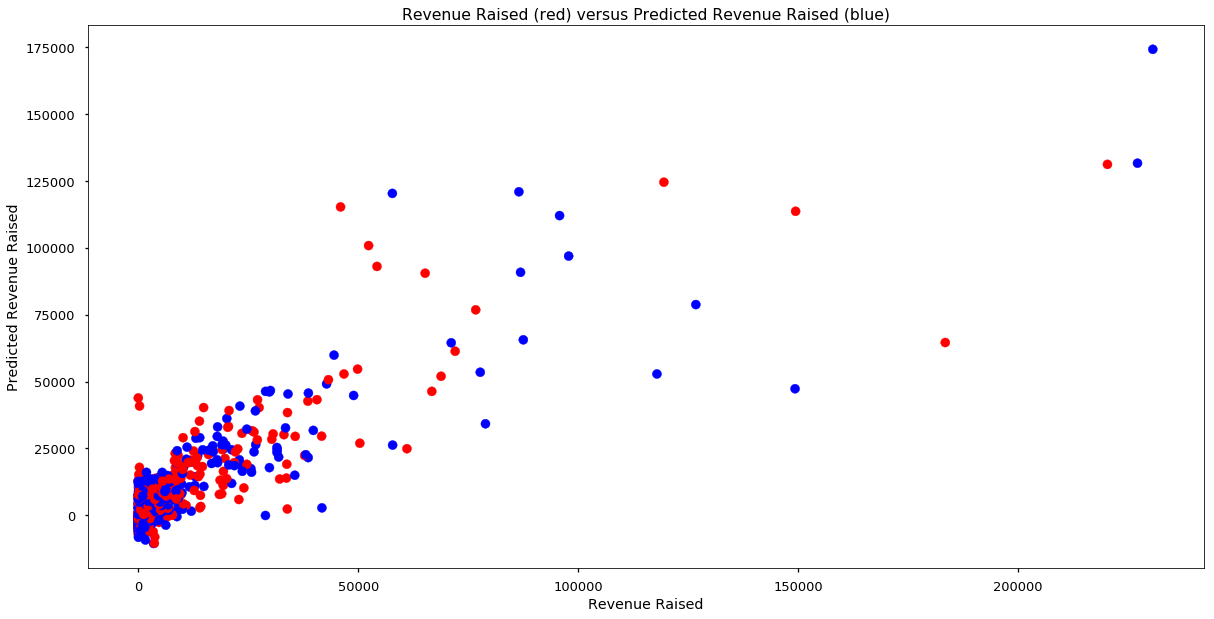

In [61]:
#scatter plot to compare actual and predicted gift

plt.figure(figsize=(20,10))

plt.scatter(y,linreg.predict(X),color=['red','blue'])

plt.xlabel('Revenue Raised')

plt.title('Revenue Raised (red) versus Predicted Revenue Raised (blue)')
plt.ylabel('Predicted Revenue Raised')

Text(0,0.5,'residuals')

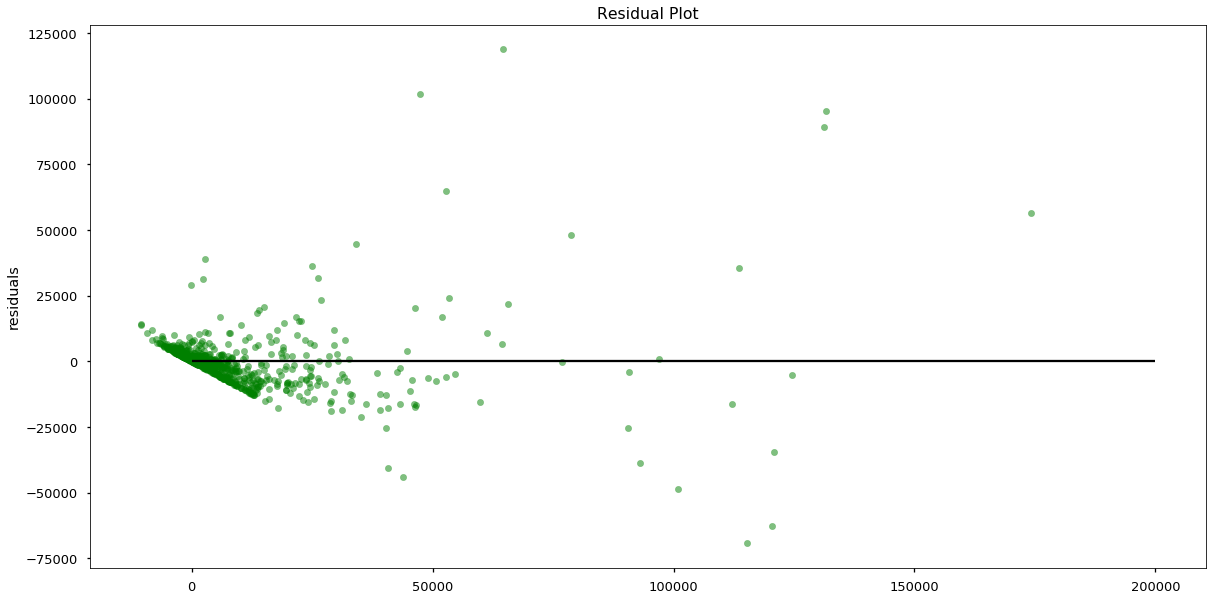

In [62]:
# Residuals
plt.figure(figsize=(20,10))

plt.scatter(linreg.predict(X),y - linreg.predict(X), color=['green'],s=40,alpha=0.5)
#plt.scatter(linreg.predict(X_test),linreg.predict(X_test) - y_test, color=['blue'],s=40)
plt.hlines(y=0,xmin=0,xmax=200000)

plt.title('Residual Plot')

plt.ylabel('residuals')


In [63]:
#set up model training

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [64]:


# Predict results and calculating accuracy to compare to original r^2

y_pred = linreg.predict(X)
print('Accuracy of linear regression classifier on test set: {:.2f}'.format(linreg.score(X_test, y_test)))

Accuracy of linear regression classifier on test set: 0.73


In [65]:


linreg.score(X_test, y_test)

0.73403510705906894

Text(0,0.5,'residuals')

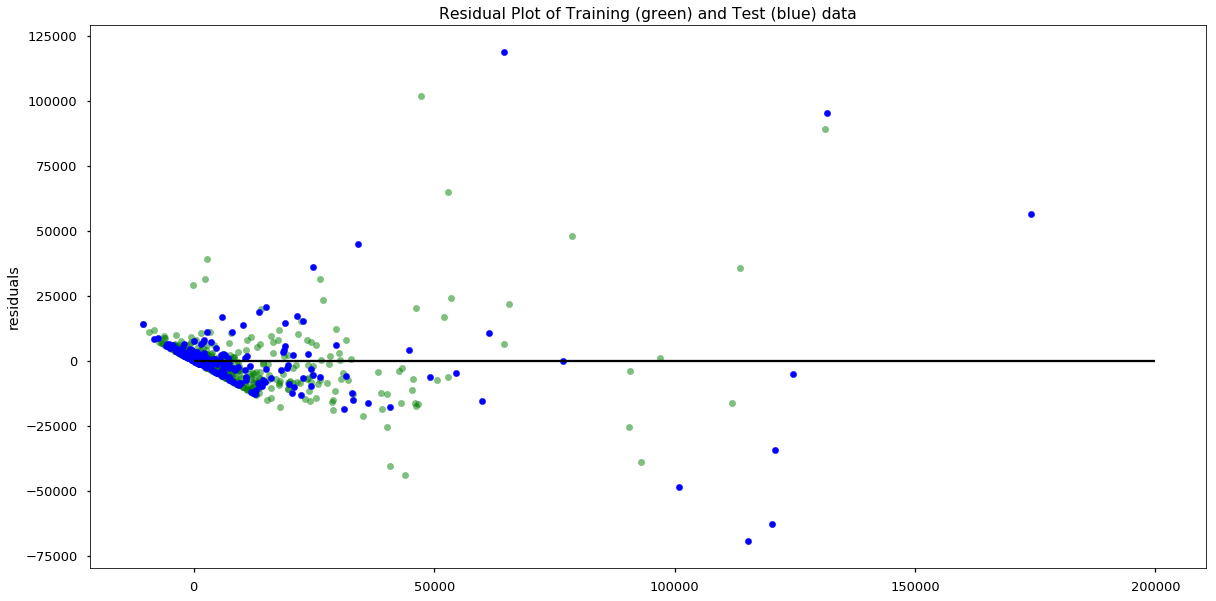

In [66]:
# Residuals
plt.figure(figsize=(20,10))

plt.scatter(linreg.predict(X_train),y_train - linreg.predict(X_train), color=['green'],s=40,alpha=0.5)
plt.scatter(linreg.predict(X_test),y_test - linreg.predict(X_test), color=['blue'],s=40)
plt.hlines(y=0,xmin=0,xmax=200000)

plt.title('Residual Plot of Training (green) and Test (blue) data')

plt.ylabel('residuals')

## Adjustments to the Model

Residuals show evidence of Heteroskedasticity. This is likely due to the large range between the largest and smallest gift amounts. It is likely the error variance changes proportionally with a factor. 


To adjust for this, the current dependent variable 'Revenue Raised' will be divided by the 'Number of Team Members (local)' value to redfine the dependent variable in order to reduce the impact of the vast differences in revenue amounts. 

### Examining 'Number of Team Members (local)'

In [67]:
nationalteamsd['Number of Team Members (local)'].describe()

count    810.000000
mean      11.839506
std       19.103684
min        1.000000
25%        2.000000
50%        5.000000
75%       12.000000
max      172.000000
Name: Number of Team Members (local), dtype: float64

### Sixty-Three 'Number of Team Members (local)' were equal to blank. Since they had positive revenues raised, they were replaced with the average team size (12).

### Model #2

In [68]:
#set up data for regression
y = (nationalteamsd['Revenue Raised'] / nationalteamsd['Number of Team Members (local)'])
print(y.describe())

count      810.000000
mean       565.322193
std        760.061125
min          0.000000
25%        123.125000
50%        413.785714
75%        728.250000
max      11289.000000
dtype: float64


In [69]:
#Left out 'Other' for connection to MS, and'ND' for state to account for dummy trap
X = nationalteamsd[['Event Month','Event Year','Relative has MS','None','No Connection','Has MS','Parent has MS','Spouse has MS','Child has MS','Sibling has MS','TX', 'PA', 'NJ', 'CA', 'MN', 'NY', 'FL', 'MA', 'IL', 'MI', 'OH', 'NC', 'WA', 'CO', 'MO', 'UT', 'MD', 'VA', 'CT', 'AZ', 'GA', 'WI', 'KY', 'KS', 'TN', 'AL', 'AR', 'DE', 'NH', 'DC', 'IN', 'OK', 'IA', 'AK', 'RI', 'RI', 'NM', 'NE', 'NV', 'OR', 'MS', 'SD', 'WV', 'LA', 'ME', 'SC','MT']]
X = sm.add_constant(X)
#check data

X.head()

,const,Event Month,Event Year,Relative has MS,None,No Connection,Has MS,Parent has MS,Spouse has MS,Child has MS,...,NE,NV,OR,MS,SD,WV,LA,ME,SC,MT
0,1.0,9,2016,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,3,2018,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,3,2018,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,3,2018,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,3,2017,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
#run ols regression

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.8985
Date:                Thu, 12 Jul 2018   Prob (F-statistic):              0.685
Time:                        14:06:20   Log-Likelihood:                -6495.7
No. Observations:                 810   AIC:                         1.311e+04
Df Residuals:                     753   BIC:                         1.337e+04
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1995.1035   3.05e+04     

### OLS Regression results indicated the following variables were significant at the 95% level.


| Variable| coef |   std err  |         t   |    P>*t*  |     [0.025  |     0.975]| 
| ------------- |-------------| -----| -----| -----| -----| 
| CT	| 617.6135	| 240.887	| 2.564	| 0.011	| 144.724	| 1090.502
| DC	| 714.484	| 360.085	| 1.984	| 0.048	| 7.595	| 1421.373



### Initial OLS regression results revealed that the following variables had p values greater than 0.05 and and confidence intervals about zero, which indicated they were not significant at the 95% level.
  *  Const
  *  Event Month
  *  Event Year
  *  Relative has MS
  *  None
  *  No Connection
  *  Has MS
  *  Parent has MS
  *  Spouse has MS
  *  Child has MS
  *  Sibling has MS
  *  TX
  *  PA
  *  NJ
  *  CA
  *  MN
  *  NY
  *  FL
  *  MA
  *  IL
  *  MI
  *  OH
  *  NC
  *  WA
  *  CO
  *  MO
  *  UT
  *  MD
  *  VA
  *  AZ
  *  GA
  *  WI
  *  KY
  *  KS
  *  TN
  *  AL
  *  AR
  *  DE
  *  NH
  *  IN
  *  OK
  *  IA
  *  AK
  *  RI
  *  RI
  *  NM
  *  NE
  *  NV
  *  OR
  *  MS
  *  SD
  *  WV
  *  LA
  *  ME
  *  SC
  *  MT

In [71]:
#compute the condition number to assess multicollinearity. according to Greene, >20 conditional number is bad (https://www.amazon.com/Econometric-Analysis-8th-William-Greene/dp/0134461363/ref=dp_ob_title_bk)
np.linalg.cond(X.values)

9.8952469222662721e+20

In [72]:
# Fitting regression model

linreg = LinearRegression()

linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [73]:
#checking the r^2 score 

linreg.score(X, y)

0.062634325735958618

In [74]:
# getting number of coefficients
print('Number of coefficients:',len(linreg.coef_))

Number of coefficients: 58


In [75]:
# predicting gift amount
linreg.predict(X)

array([  286.16638027,   753.76025645,   801.44952103,   753.76025645,
         697.42787236,   395.18246439,   308.10224694,   660.56768825,
         428.0896558 ,   501.80727836,   280.18189866,   382.78427914,
        1129.21218264,   852.15530728,   504.69363988,   552.38290446,
         505.36190326,   535.38879108,   441.55436986,   412.84484114,
         365.15557656,   393.86510528,   434.10175602,   529.53760186,
         437.782808  ,   508.01578912,   932.90855144,   800.85288013,
         753.83187893,   753.83187893,   423.22372973,   419.86155077,
         616.32784071,   712.64702213,   915.66727597,   507.34752575,
         442.93907191,   607.48234962,   663.34884191,   664.01710529,
        1019.19944661,   562.92648077,   672.41037139,   507.34752575,
         481.94046881,   363.13847498,   363.13847498,   363.80673835,
         219.12749827,   431.12719235,   213.65401553,   363.13847498,
         218.95252803,   423.22372973,   423.22372973,   164.4266108 ,
      

Text(0.5,1,'Revenue Raised/Team Member (red) versus Predicted Revenue Raised/Team Member (blue)')

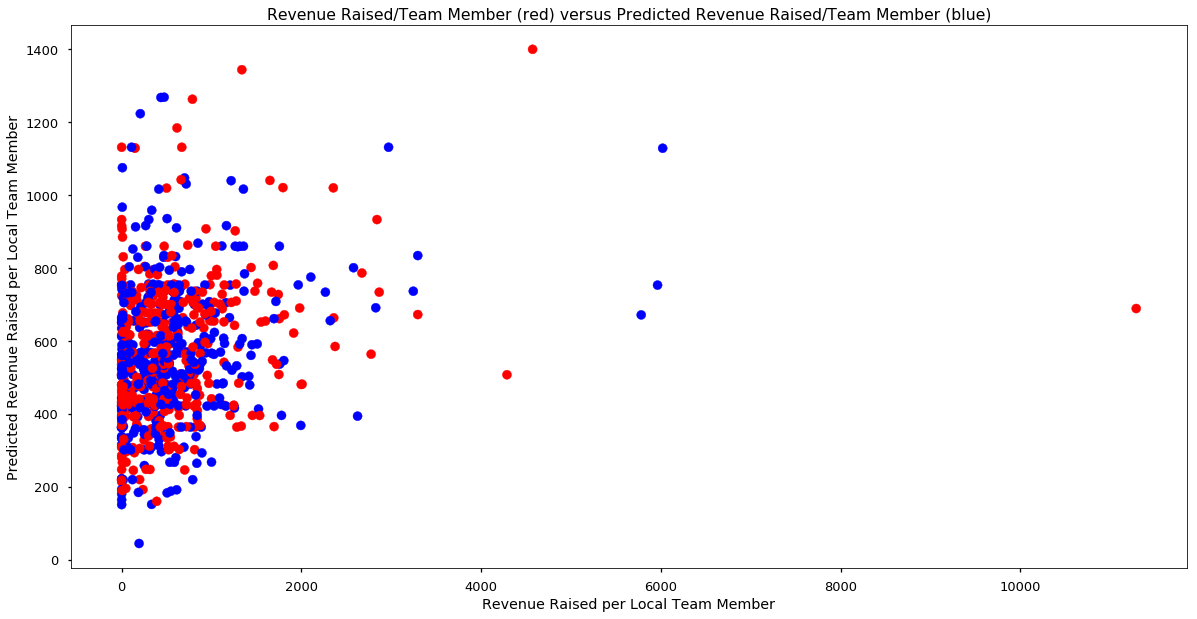

In [76]:
#scatter plot to compare actual and predicted gift






plt.figure(figsize=(20,10))

plt.scatter(y,linreg.predict(X),color=['red','blue'])

plt.xlabel('Revenue Raised per Local Team Member')

plt.ylabel('Predicted Revenue Raised per Local Team Member')


plt.title('Revenue Raised/Team Member (red) versus Predicted Revenue Raised/Team Member (blue)')

Text(0,0.5,'residuals')

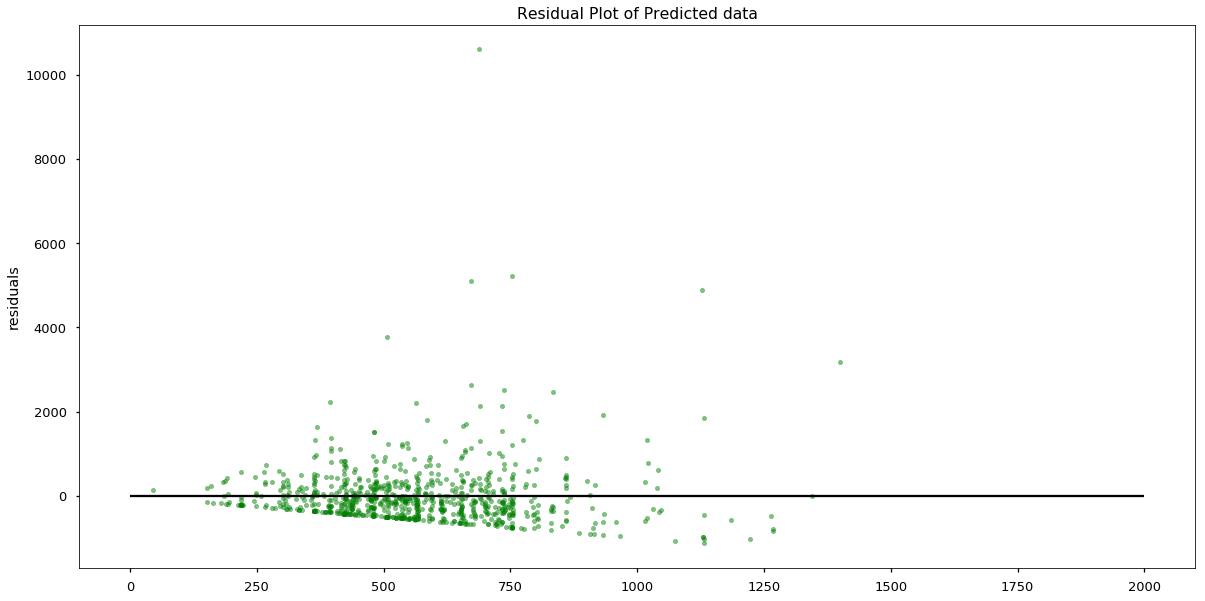

In [77]:
# Residuals
plt.figure(figsize=(20,10))

plt.scatter(linreg.predict(X),y -linreg.predict(X), color=['green'],s=20,alpha=0.5)
#plt.scatter(linreg.predict(X_test),linreg.predict(X_test) - y_test, color=['blue'],s=40)
plt.hlines(y=0,xmin=0,xmax=2000)

plt.title('Residual Plot of Predicted data')

plt.ylabel('residuals')

In [78]:
#set up model training

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [79]:
# Fitting training regression model

linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [80]:
# Predict results and calculating accuracy to compare to original r^2

y_pred = linreg.predict(X)
print('Accuracy of linear regression classifier on test set: {:.2f}'.format(linreg.score(X_test, y_test)))

Accuracy of linear regression classifier on test set: -0.03


In [81]:
linreg.score(X_test, y_test)

-0.033992020435635428

Text(0,0.5,'residuals')

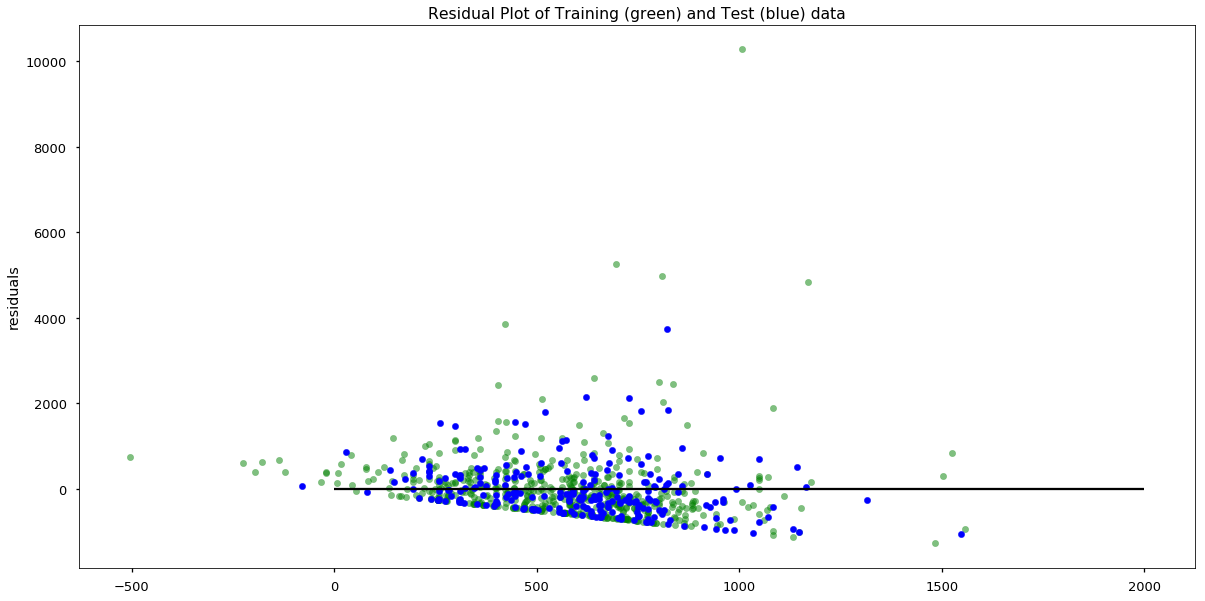

In [82]:
# Residuals
plt.figure(figsize=(20,10))

plt.scatter(linreg.predict(X_train),y_train - linreg.predict(X_train), color=['green'],s=40,alpha=0.5)
plt.scatter(linreg.predict(X_test),y_test - linreg.predict(X_test), color=['blue'],s=40)
plt.hlines(y=0,xmin=0,xmax=2000)

plt.title('Residual Plot of Training (green) and Test (blue) data')

plt.ylabel('residuals')

### Further Adjustments

The following teams are the largest per member revenue raisers. It appears the 11,289 per member is causing the issue with Heteroskedasticity, but are the other teams outliers?



| Revenue Raised	| Number of Team Members (local)	| $/Member
| ------------- |-------------|-------------|
| 33867	| 3	| 11289
| 12040	| 2	| 6020
| 41741	| 7	| 5963
| 28905.8	| 5	| 5781.16
| 22863.5	| 5	| 4572.7
| 8575	| 2	| 4287.5
| 3295	| 1	| 3295
| 3295	| 1	| 3295
| 149275.38	| 46	| 3245.12
| 8910	| 3	| 2970
| 183415	| 64	| 2865.86
| 14205	| 5	| 2841
| 5655	| 2	| 2827.5
| 61062.63	| 22	| 2775.57
| 8020	| 3	| 2673.33
| 2625	| 1	| 2625
| 2580	| 1	| 2580
| 4750	| 2	| 2375
| 2360	| 1	| 2360
| 14131	| 6	| 2355.17
| 78911.62	| 34	| 2320.93
| 117884.73	| 52	| 2267.01
| 2105	| 1	| 2105
| 32130	| 16	| 2008.13
| 13983	| 7	| 1997.57
| 57808	| 29	| 1993.38
| 33672	| 17	| 1980.71
| 1965	| 1	| 1965
| 3828	| 2	| 1914
| 10862	| 6	| 1810.333
| 9023	| 5	| 1804.6
| 5385.01	| 3	| 1795.00
| 35572	| 20	| 1778.6
| 8795	| 5	| 1759
| 38618	| 22	| 1755.36
| 19305.01	| 11	| 1755.00
| 1750	| 1	| 1750
| 1743.42	| 1	| 1743.42
| 18960	| 11	| 1723.64
| 25744.18	| 15	| 1716.28
| 3392.5	| 2	| 1696.25
| 227108.56	| 134	| 1694.84
| 33755.18	| 20	| 1687.76
| 50359	| 30	| 1678.63
| 220278	| 132	| 1668.77
| 4950	| 3	| 1650
| 24003	| 15	| 1600.2





An observation is an outlier if it falls more than 1.5(IQR) above the upper quartile or more than 1.5(IQR) below the lower quartile.


Revenue Raised per Local Team Member Summary Statistics:


| Description	| Value
| ------------- |-------------|
|count     | 810.000000
|mean      | 565.322193
|std        |760.061125
|min         | 0.000000
|25%    |    123.125000
|50%     |   413.785714
|75%      |  728.250000
|max      |11289.000000

IQR = Q3 − Q1 = 728.25 − 123.125 = 605.125

1.5(IQR) = 1.5(605.125) = 907.6875

Q1 − 907.6875 = 123.125 - 907.6875 = −784.5625. 
The minimum value is 0 so there are no outliers in the bottom of the distribution.

Q3 + 907.6875 = 728.25 + 907.6875 = 1,635.9375. 
The maximum value is 11,289 so there are outliers in the top of the distribution.

### All Revenues Raised per Local Team member in excess of 1,635.9375 will be eliminated from the forecast.

### Model 3

In [83]:
# dropping rows with outliers

nationalteamsdd = nationalteamsd.assign(RevenuePerTeammate=(nationalteamsd['Revenue Raised'] / nationalteamsd['Number of Team Members (local)']).values)

nationalteamsdd.head()

,National Team Name,Event Chapter,Event Category,Event Type,Local Team Name,Event Name,Event Start Date,Event Month,Event Day,Event Year,...,TN,TX,UT,VA,WA,WI,WV,No,Yes,RevenuePerTeammate
0,0,ALC,Bike,MS 150 (2 Day Bike),Mobilians on Bikes,ALC 2016 Bike MS: Tour de Beach,2016-09-17,9,17,2016,...,0,0,0,0,0,0,0,1,0,0.0
1,American Express Bike Team,AZA,Bike,MS 150 (2 Day Bike),Ride For Life,AZA 2018 Bike MS: Arizona,2018-03-24,3,24,2018,...,0,0,0,0,0,0,0,0,1,100.0
2,Point B Bike Team,AZA,Bike,MS 150 (2 Day Bike),Point B Phoenix,AZA 2018 Bike MS: Arizona,2018-03-24,3,24,2018,...,0,0,0,0,0,0,0,1,0,1440.0
3,Progressive Bike Team,AZA,Bike,MS 150 (2 Day Bike),Team Progressive,AZA 2018 Bike MS: Arizona,2018-03-24,3,24,2018,...,0,0,0,0,0,0,0,0,1,1965.0
4,0,CAL,Bike,MS 150 (2 Day Bike),AV Road Crew,CAL 2017 Bike MS: Coastal Challenge,2017-03-25,3,25,2017,...,0,0,0,0,0,0,0,0,1,100.0


In [84]:
#set up data for regression
y = (nationalteamsdd['RevenuePerTeammate'])
print(y.describe())

count      810.000000
mean       565.322193
std        760.061125
min          0.000000
25%        123.125000
50%        413.785714
75%        728.250000
max      11289.000000
Name: RevenuePerTeammate, dtype: float64


In [85]:
ntddd = nationalteamsdd[nationalteamsdd['RevenuePerTeammate'] < 1635.9375]
ntddd.head()

,National Team Name,Event Chapter,Event Category,Event Type,Local Team Name,Event Name,Event Start Date,Event Month,Event Day,Event Year,...,TN,TX,UT,VA,WA,WI,WV,No,Yes,RevenuePerTeammate
0,0,ALC,Bike,MS 150 (2 Day Bike),Mobilians on Bikes,ALC 2016 Bike MS: Tour de Beach,2016-09-17,9,17,2016,...,0,0,0,0,0,0,0,1,0,0.0
1,American Express Bike Team,AZA,Bike,MS 150 (2 Day Bike),Ride For Life,AZA 2018 Bike MS: Arizona,2018-03-24,3,24,2018,...,0,0,0,0,0,0,0,0,1,100.0
2,Point B Bike Team,AZA,Bike,MS 150 (2 Day Bike),Point B Phoenix,AZA 2018 Bike MS: Arizona,2018-03-24,3,24,2018,...,0,0,0,0,0,0,0,1,0,1440.0
4,0,CAL,Bike,MS 150 (2 Day Bike),AV Road Crew,CAL 2017 Bike MS: Coastal Challenge,2017-03-25,3,25,2017,...,0,0,0,0,0,0,0,0,1,100.0
5,Team In Motion Bike Team,CAL,Bike,One Day Bike,Team in Motion,CAL 2017 Bike MS: Las Vegas,2017-10-28,10,28,2017,...,0,0,0,0,0,0,0,0,0,0.0


In [86]:
#set up data for regression
y = (ntddd['RevenuePerTeammate'])
print(y.describe())

count     764.000000
mean      435.726242
std       378.309194
min         0.000000
25%       100.000000
50%       379.121795
75%       650.000000
max      1600.200000
Name: RevenuePerTeammate, dtype: float64


In [87]:
#Left out 'Other' for connection to MS, and'ND' for state to account for dummy trap
X = ntddd[['Event Month','Event Year','Relative has MS','None','No Connection','Has MS','Parent has MS','Spouse has MS','Child has MS','Sibling has MS','TX', 'PA', 'NJ', 'CA', 'MN', 'NY', 'FL', 'MA', 'IL', 'MI', 'OH', 'NC', 'WA', 'CO', 'MO', 'UT', 'MD', 'VA', 'CT', 'AZ', 'GA', 'WI', 'KY', 'KS', 'TN', 'AL', 'AR', 'DE', 'NH', 'DC', 'IN', 'OK', 'IA', 'AK', 'RI', 'RI', 'NM', 'NE', 'NV', 'OR', 'MS', 'SD', 'WV', 'LA', 'ME', 'SC','MT']]
X = sm.add_constant(X)
#check data

X.head()

,const,Event Month,Event Year,Relative has MS,None,No Connection,Has MS,Parent has MS,Spouse has MS,Child has MS,...,NE,NV,OR,MS,SD,WV,LA,ME,SC,MT
0,1.0,9,2016,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,3,2018,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,3,2018,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,3,2017,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1.0,10,2017,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
#run ols regression

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     RevenuePerTeammate   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     1.781
Date:                Thu, 12 Jul 2018   Prob (F-statistic):           0.000587
Time:                        14:06:22   Log-Likelihood:                -5568.0
No. Observations:                 764   AIC:                         1.125e+04
Df Residuals:                     707   BIC:                         1.151e+04
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            5.692e+04   1.52e+04     

### OLS Regression results indicated the following variables were significant at the 95% level.


| Variable| coef |   std err  |         t   |    P>*t*  |     [0.025  |     0.975]| 
| ------------- |-------------| -----| -----| -----| -----| 
| const	| 56920	| 15200	| 3.753	| 0	| 27100	| 86700
| Event Year	| -28.0101	| 7.521	| -3.724	| 0	| -42.776	| -13.245
| No Connection	| -127.2564	| 60.193	| -2.114	| 0.035	| -245.435	| -9.078
| Parent has MS	| -167.782	| 61.443	| -2.731	| 0.006	| -288.416	| -47.148
| Sibling has MS	| 284.761	| 93.468	| 3.047	| 0.002	| 101.252	| 468.27
| PA	| 146.3254	| 69.834	| 2.095	| 0.036	| 9.218	| 283.433
| CO	| 334.7104	| 102.018	| 3.281	| 0.001	| 134.415	| 535.006
| MO	| 216.7938	| 103.849	| 2.088	| 0.037	| 12.905	| 420.683
| SC	| 1052.863	| 375.222	| 2.806	| 0.005	| 316.18	| 1789.546


### Initial OLS regression results revealed that the following variables had p values greater than 0.05 and  and confidence intervals about zero, which indicated they were not significant at the 95% level.
  *  Event Month
  *  Relative has MS
  *  None
  *  Has MS
  *  Spouse has MS
  *  Child has MS
  *  TX
  *  NJ
  *  CA
  *  MN
  *  NY
  *  FL
  *  MA
  *  IL
  *  MI
  *  OH
  *  NC
  *  WA
  *  UT
  *  MD
  *  VA
  *  CT
  *  AZ
  *  GA
  *  WI
  *  KY
  *  KS
  *  TN
  *  AL
  *  AR
  *  DE
  *  NH
  *  DC
  *  IN
  *  OK
  *  IA
  *  AK
  *  RI
  *  RI
  *  NM
  *  NE
  *  NV
  *  OR
  *  MS
  *  SD
  *  WV
  *  LA
  *  ME
  *  MT

In [89]:
#compute the condition number to assess multicollinearity. according to Greene, >20 conditional number is bad (https://www.amazon.com/Econometric-Analysis-8th-William-Greene/dp/0134461363/ref=dp_ob_title_bk)
np.linalg.cond(X.values)

1.6252918493558836e+20

In [90]:
# Fitting regression model

linreg = LinearRegression()

linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [91]:
#checking the r^2 score 

linreg.score(X, y)

0.11624368388367912

In [92]:
# getting intercept coefficient

print('Estimated intercept coefficient:',linreg.intercept_)


Estimated intercept coefficient: 56799.12468


In [93]:
# getting number of coefficients
print('Number of coefficients:',len(linreg.coef_))

Number of coefficients: 58


In [94]:
# predicting gift amount
linreg.predict(X)



array([  119.28262893,   518.49013113,   557.23962134,   497.29681625,
         321.29411769,   225.51736057,   330.20568001,   352.27731349,
         455.27584171,   358.058826  ,   432.08297967,   404.7645295 ,
         351.31862367,   282.28658139,   321.03607161,   310.23792998,
         371.27434849,   336.95458414,   299.0071894 ,   260.25769918,
         180.50943758,   619.97639149,   411.37119128,   389.22965092,
         387.56979782,   455.93516687,   455.93516687,   331.29016385,
         434.09306564,   371.74055182,   274.03698779,   469.49119735,
         361.27830233,   198.68686332,   561.12467996,   410.49004203,
         332.17009259,   325.44681624,   361.27830233,   405.34835989,
         271.42315736,   271.42315736,   299.37450595,   164.2682122 ,
         233.25765989,    53.65166123,   271.42315736,   365.77935389,
         331.29016385,   331.29016385,   175.09530086,    87.91582142,
         233.56282635,   309.96372046,    70.50518401,   338.77239443,
      

Text(0,0.5,'residuals')

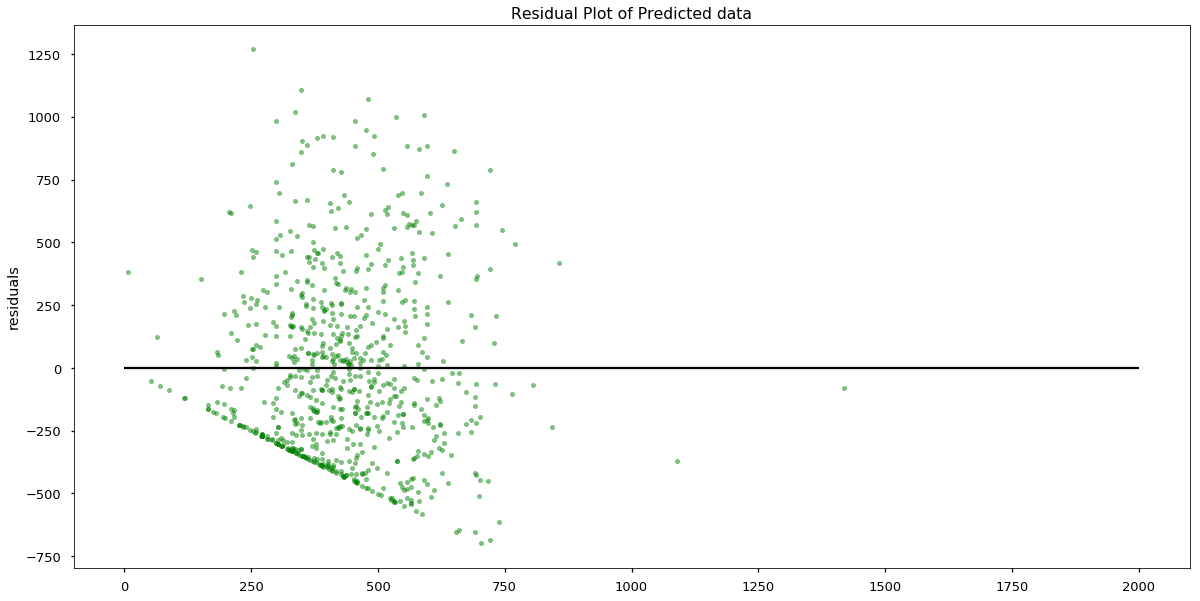

In [95]:
# Residuals
plt.figure(figsize=(20,10))

plt.scatter(linreg.predict(X),y - linreg.predict(X), color=['green'],s=20,alpha=0.5)
#plt.scatter(linreg.predict(X_test),linreg.predict(X_test) - y_test, color=['blue'],s=40)
plt.hlines(y=0,xmin=0,xmax=2000)

plt.title('Residual Plot of Predicted data')

plt.ylabel('residuals')

In [96]:
#Heterskedasticity Test: Breush-Pagan test
name = ['Lagrange multiplier statistic', 'p-value', 
        'f-value', 'f p-value']
test = sms.het_breushpagan(results.resid, results.model.exog)
lzip(name, test)

C:\Users\millsj.ADMIN\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `het_breushpagan` is deprecated, use `het_breuschpagan` instead!
Use het_breuschpagan, het_breushpagan will be removed in 0.9 
(Note: misspelling missing 'c')
  after removing the cwd from sys.path.


[('Lagrange multiplier statistic', 60.521439425613153),
 ('p-value', 0.34995850002576501),
 ('f-value', 1.0861499064370863),
 ('f p-value', 0.31518573117275933)]

Breush-Pagan test assumes a null hypothesis of homoskedasticity so if the p-value is less than 0.05 (95% confidence level) the null is rejected and infer heteroskewdasticity is present. Here the p-value is not significant at the 95% confidence level so we fall to reject the null hypothesis of homoskedasticity.

In [97]:
#Heterskedasticity Test: White test
name = ['Lagrange multiplier statistic', 'f-value', 'f p-value']
test = sms.het_white(results.resid, results.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 296.06946874764446),
 ('f-value', 0.14147148957816197),
 ('f p-value', 1.1487037890413578)]

For the White test: again the p-value is not significant at the 95% confidence level so we fall to reject the null hypothesis of homoskedasticity.

In [98]:
#set up model training

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [99]:
# Fitting training regression model

linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [100]:
# Predict results and calculating accuracy to compare to original r^2

y_pred = linreg.predict(X)
print('Accuracy of linear regression classifier on test set: {:.2f}'.format(linreg.score(X_test, y_test)))

Accuracy of linear regression classifier on test set: -0.03


In [101]:
linreg.score(X_test, y_test)

-0.027178037530238841

Text(0,0.5,'residuals')

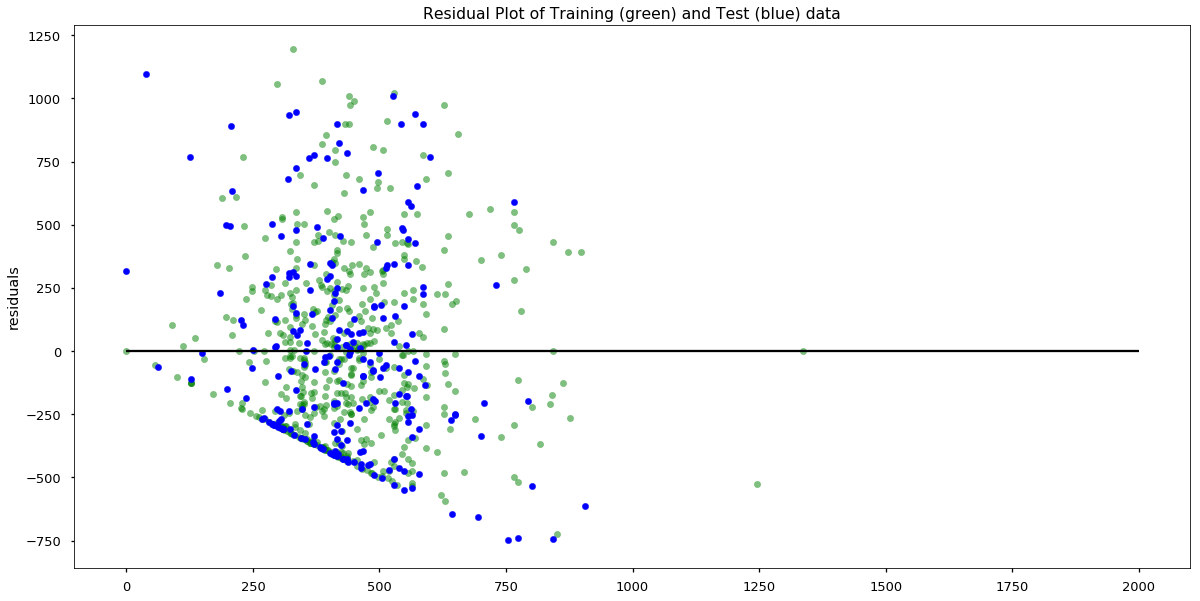

In [102]:
# Residuals
plt.figure(figsize=(20,10))

plt.scatter(linreg.predict(X_train),y_train - linreg.predict(X_train), color=['green'],s=40,alpha=0.5)
plt.scatter(linreg.predict(X_test),y_test - linreg.predict(X_test), color=['blue'],s=40)
plt.hlines(y=0,xmin=0,xmax=2000)

plt.title('Residual Plot of Training (green) and Test (blue) data')

plt.ylabel('residuals')

The removal of outliers and modeling revenues per teammate has corrected the homoskedasticity issue with earlier regression model versions 1 and 2. The 3rd revision to the regression now is a working model for analysis.

In [13]:
#set up data for regression
y = (nationalteamsd['Revenue Raised'])
print(y.describe())

count       810.000000
mean       8817.188235
std       22295.006194
min           0.000000
25%         346.250000
50%        1692.500000
75%        6713.750000
max      230589.240000
Name: Revenue Raised, dtype: float64


### Further Adjustments

An observation is an outlier if it falls more than 1.5(IQR) above the upper quartile or more than 1.5(IQR) below the lower quartile.


IQR = Q3 − Q1 = 6713.75 − 346.25 = 6367.5

1.5(IQR) = 1.5(6367.5) = 9551.25

Q1 − 9551.25 = 346.25 - 9551.25 = −9205. 
The minimum value is 0 so there are no outliers in the bottom of the distribution.

Q3 + 9551.25 = 6713.75 + 9551.25 = 16,265. 
The maximum value is 230589.24 so there are outliers in the top of the distribution.

### All Revenues Raised in excess of 16,265 will be eliminated from the forecast.

In [14]:
# dropping rows with outliers


In [15]:
ntdddd = nationalteamsd[nationalteamsd['Revenue Raised'] < 16265]
ntdddd.head()

,National Team Name,Event Chapter,Event Category,Event Type,Local Team Name,Event Name,Event Start Date,Event Month,Event Day,Event Year,...,SD,TN,TX,UT,VA,WA,WI,WV,No,Yes
0,0,ALC,Bike,MS 150 (2 Day Bike),Mobilians on Bikes,ALC 2016 Bike MS: Tour de Beach,2016-09-17,9,17,2016,...,0,0,0,0,0,0,0,0,1,0
1,American Express Bike Team,AZA,Bike,MS 150 (2 Day Bike),Ride For Life,AZA 2018 Bike MS: Arizona,2018-03-24,3,24,2018,...,0,0,0,0,0,0,0,0,0,1
2,Point B Bike Team,AZA,Bike,MS 150 (2 Day Bike),Point B Phoenix,AZA 2018 Bike MS: Arizona,2018-03-24,3,24,2018,...,0,0,0,0,0,0,0,0,1,0
3,Progressive Bike Team,AZA,Bike,MS 150 (2 Day Bike),Team Progressive,AZA 2018 Bike MS: Arizona,2018-03-24,3,24,2018,...,0,0,0,0,0,0,0,0,0,1
4,0,CAL,Bike,MS 150 (2 Day Bike),AV Road Crew,CAL 2017 Bike MS: Coastal Challenge,2017-03-25,3,25,2017,...,0,0,0,0,0,0,0,0,0,1


In [16]:
ntdddd.describe()

,Event Month,Event Day,Event Year,Corporate Name,Revenue Raised,Number of Team Members (local),Local Team Captain Member ID,Local Team Captain Contact ID,Local Team Captain Zip Code,Child has MS,...,SD,TN,TX,UT,VA,WA,WI,WV,No,Yes
count,695.000000,695.000000,695.000000,695.0,695.000000,695.000000,6.950000e+02,6.950000e+02,695.000000,695.000000,...,695.000000,695.000000,695.000000,695.000000,695.000000,695.000000,695.000000,695.000000,695.000000,695.000000
mean,7.411511,15.689209,2015.633094,0.0,2619.043755,6.551079,6.544294e+07,9.083290e+06,41771.890647,0.028777,...,0.002878,0.008633,0.102158,0.021583,0.017266,0.023022,0.011511,0.002878,0.141007,0.775540
std,1.971814,8.611606,1.924152,0.0,3436.062070,6.740554,2.516457e+07,5.407598e+06,31874.864777,0.167300,...,0.053606,0.092579,0.303074,0.145421,0.130355,0.150080,0.106746,0.053606,0.348280,0.417527
min,3.000000,1.000000,2012.000000,0.0,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,8.000000,2013.000000,0.0,250.000000,2.000000,5.452369e+07,3.982568e+06,10082.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,8.000000,16.000000,2016.000000,0.0,1110.000000,4.000000,6.982892e+07,9.911077e+06,37064.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,9.000000,23.000000,2017.000000,0.0,3687.315000,10.000000,8.624659e+07,1.434475e+07,75029.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,11.000000,30.000000,2018.000000,0.0,16041.000000,49.000000,9.126578e+07,1.633998e+07,99507.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
#set up data for regression

y = ntdddd['Revenue Raised']

#Left out 'Other' for connection to MS, and'ND' for state to account for dummy trap
X = ntdddd[["Number of Team Members (local)",'Event Month','Event Year','Relative has MS','None','No Connection','Has MS','Parent has MS','Spouse has MS','Child has MS','Sibling has MS','TX', 'PA', 'NJ', 'CA', 'MN', 'NY', 'FL', 'MA', 'IL', 'MI', 'OH', 'NC', 'WA', 'CO', 'MO', 'UT', 'MD', 'VA', 'CT', 'AZ', 'GA', 'WI', 'KY', 'KS', 'TN', 'AL', 'AR', 'DE', 'NH', 'DC', 'IN', 'OK', 'IA', 'AK', 'RI', 'RI', 'NM', 'NE', 'NV', 'OR', 'MS', 'SD', 'WV', 'LA', 'ME', 'SC','MT']]
X = sm.add_constant(X)
#check data

X.head()

,const,Number of Team Members (local),Event Month,Event Year,Relative has MS,None,No Connection,Has MS,Parent has MS,Spouse has MS,...,NE,NV,OR,MS,SD,WV,LA,ME,SC,MT
0,1.0,1,9,2016,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,1,3,2018,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,1,3,2018,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,1,3,2018,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,1,3,2017,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
#run ols regression

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         Revenue Raised   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.406
Method:                 Least Squares   F-statistic:                     9.318
Date:                Mon, 16 Jul 2018   Prob (F-statistic):           2.26e-53
Time:                        17:43:18   Log-Likelihood:                -6433.7
No. Observations:                 695   AIC:                         1.298e+04
Df Residuals:                     637   BIC:                         1.325e+04
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

### OLS Regression results indicated the following variables were significant at the 95% level.


| Variable| coef |   std err  |         t   |    P>*t*  |     [0.025  |     0.975]| 
| ------------- |-------------| -----| -----| -----| -----| 
| Number of Team Members (local)	| 318.3032	| 15.77	| 20.184	| 0	| 287.336	| 349.271
| CA	| 1110.4398	| 556.066	| 1.997	| 0.046	| 18.495	| 2202.384
| MA	| 1234.7461	| 593.198	| 2.082	| 0.038	| 69.886	| 2399.606
| IL	| 1723.2898	| 621.099	| 2.775	| 0.006	| 503.641	| 2942.939
| CO	| 2504.4902	| 820.546	| 3.052	| 0.002	| 893.188	| 4115.792
| NH	| 3845.486	| 1263.075	| 3.045	| 0.002	| 1365.192	| 6325.779




### Initial OLS regression results revealed that the following variables had p values greater than 0.05 and  and confidence intervals about zero, which indicated they were not significant at the 95% level.
  *  const
  *  Event Month
  *  Event Year
  *  Relative has MS
  *  None
  *  No Connection
  *  Has MS
  *  Parent has MS
  *  Spouse has MS
  *  Child has MS
  *  Sibling has MS
  *  TX
  *  PA
  *  NJ
  *  MN
  *  NY
  *  FL
  *  MI
  *  OH
  *  NC
  *  WA
  *  MO
  *  UT
  *  MD
  *  VA
  *  CT
  *  AZ
  *  GA
  *  WI
  *  KY
  *  KS
  *  TN
  *  AL
  *  AR
  *  DE
  *  DC
  *  IN
  *  OK
  *  IA
  *  AK
  *  RI
  *  RI
  *  NM
  *  NE
  *  NV
  *  OR
  *  MS
  *  SD
  *  WV
  *  LA
  *  ME
  *  SC
  *  MT

In [19]:
#compute the condition number to assess multicollinearity. according to Greene, >20 conditional number is bad (https://www.amazon.com/Econometric-Analysis-8th-William-Greene/dp/0134461363/ref=dp_ob_title_bk)
np.linalg.cond(X.values)

6.2272024446699464e+20

In [22]:
# Fitting regression model

linreg = LinearRegression()

linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
#checking the r^2 score 

linreg.score(X, y)

0.45467685719518802

In [25]:
# predicting gift amount
linreg.predict(X)

array([  7.77651212e+02,   1.09836748e+03,   1.20838091e+03,
         1.09836748e+03,   1.43635258e+03,   5.34329510e+01,
         1.16461506e+03,   1.35362123e+03,   1.17360319e+03,
         1.36006837e+03,   3.96043352e+02,   3.80000000e+02,
         1.70903231e+03,   1.71992029e+03,   3.25139776e+02,
         4.35153207e+02,   4.11321939e+02,   1.69480362e+02,
         5.14679605e+02,   4.05287960e+02,   2.95274529e+02,
         4.04666174e+02,   1.70167704e+02,   1.55462331e+03,
         7.06375119e+02,   2.32453043e+02,   2.12228177e+03,
         1.97957407e+03,   1.95574280e+03,   1.95574280e+03,
         7.66424331e+01,   9.76244896e+02,   1.42078019e+03,
         1.23270069e+03,   1.39059933e+03,   1.46270880e+02,
         1.39831300e+03,   8.89684136e+02,   1.44461146e+03,
         1.53079362e+03,   3.96928966e+03,   1.40730113e+03,
         1.46719916e+03,   1.46270880e+02,   9.02531358e+02,
        -3.05529492e+02,  -3.05529492e+02,  -2.19347329e+02,
        -1.32422876e+02,

Text(0,0.5,'residuals')

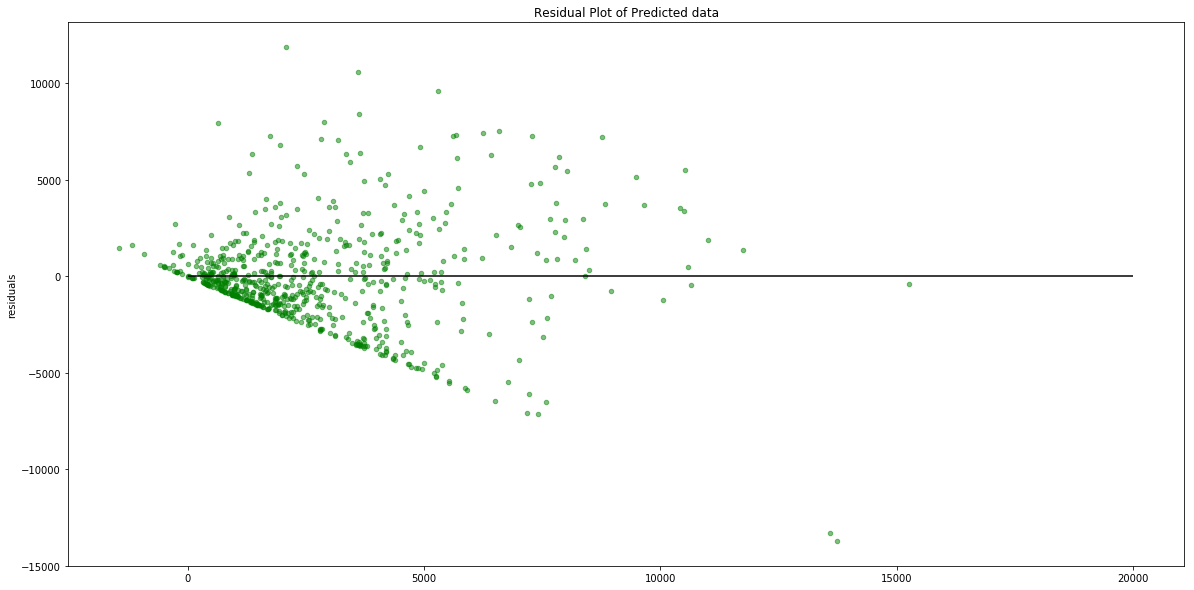

In [34]:
# Residuals
plt.figure(figsize=(20,10))

plt.scatter(linreg.predict(X),y - linreg.predict(X), color=['green'],s=20,alpha=0.5)
#plt.scatter(linreg.predict(X_test),linreg.predict(X_test) - y_test, color=['blue'],s=40)
plt.hlines(y=0,xmin=0,xmax=20000)

plt.title('Residual Plot of Predicted data')

plt.ylabel('residuals')

In [27]:
#Heterskedasticity Test: Breush-Pagan test
name = ['Lagrange multiplier statistic', 'p-value', 
        'f-value', 'f p-value']
test = sms.het_breushpagan(results.resid, results.model.exog)
lzip(name, test)

C:\Users\millsj.ADMIN\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `het_breushpagan` is deprecated, use `het_breuschpagan` instead!
Use het_breuschpagan, het_breushpagan will be removed in 0.9 
(Note: misspelling missing 'c')
  after removing the cwd from sys.path.


[('Lagrange multiplier statistic', 174.99239854822829),
 ('p-value', 1.139391976714593e-13),
 ('f-value', 3.7607465724899027),
 ('f p-value', 1.3426134415108138e-16)]

In [28]:
#set up model training

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [29]:
# Fitting training regression model

linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [30]:
# Predict results and calculating accuracy to compare to original r^2

y_pred = linreg.predict(X)
print('Accuracy of linear regression classifier on test set: {:.2f}'.format(linreg.score(X_test, y_test)))

Accuracy of linear regression classifier on test set: 0.38


In [31]:
linreg.score(X_test, y_test)

0.38465617227619375

Text(0,0.5,'residuals')

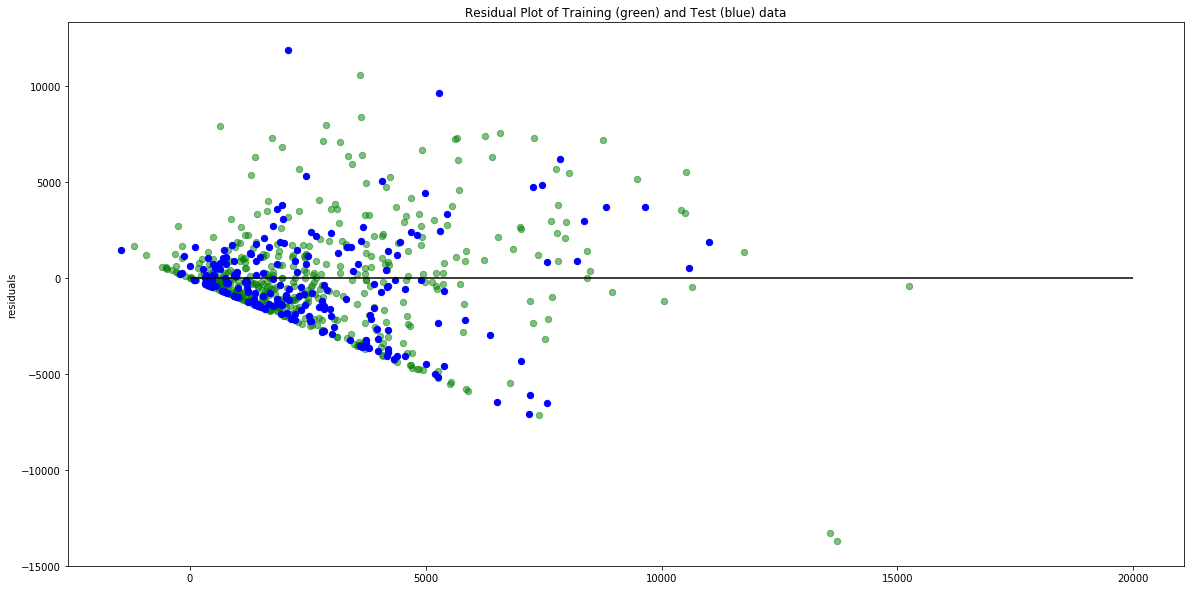

In [33]:
# Residuals
plt.figure(figsize=(20,10))

plt.scatter(linreg.predict(X_train),y_train - linreg.predict(X_train), color=['green'],s=40,alpha=0.5)
plt.scatter(linreg.predict(X_test),y_test - linreg.predict(X_test), color=['blue'],s=40)
plt.hlines(y=0,xmin=0,xmax=20000)

plt.title('Residual Plot of Training (green) and Test (blue) data')

plt.ylabel('residuals')

# FIRST PRIORITY: CORPORATE ACQUISITION
  * What are the greatest growth opportunities for new corporate teams?
  * Can we apply those opportunities to specific rides/markets, especially our biggest events?
  * What industries have had the strongest involvement in Bike MS in the last five years?
  * What occupations were responsible for most of our fundraising?
  * Can we tie together these industries and occupations to identify gaps/opportunities?
  * What is the common denominator for our top performing corporate teams? (Is it industry, culture, executive involvement, connection to MS, other?)
  * Can we quantify the effect competing events are having in our top markets? 
Top competitors:
   1. Best Buddies
     * HYANNIS PORT June 2, 2018 Boston to Hyannis Port, MA
     * HEARST CASTLE September 8, 2018 San Simeon, CA
     * MIAMI November 16, 2018 Miami, FL
   2. Peddle the Cause
     * Louis
     * San Diego
   3. Pelatonia – OH
   4. PanMass Challenge - Boston
   5. ADA – Tour de Cure
   6. Jude Children’s Research Hospital
   7. JDRF Ride to Cure Diabetes
   8. Cycle for Life - Cystic Fibrosis Foundation
   9. Ride to Recovery
   10. Virtual Cycling
   11. Athletic Club Stationary Cycling Relays
   12. American Cancer Society
   13. Leukemia and Lymphoma Society – Team in Training

# SECOND PRIORITY: DIGITAL/SOCIAL ACQUISITION
  * What are the greatest opportunities for digital marketing investments? Where have we seen the greatest ROI?
  * Once someone is registered, what tactics and behaviors drive fundraising, and at what times leading up to the event?
  * What behavioral data do you see about usage of our fundraising tools and how it may or may not relate to performance of top fundraisers?
  * Despite increasing our digital advertising spend, acquisition continues to trend downward overall. Why? Is it an issue of needing more traffic, better targeting, or a conversion rate issue that needs to be addressed through the registration process? What can we do to reverse the trend?


# FINALLY:
  * As you studied this data, is there something else that came up as an insight into our operations that the questions above do not capture? 


# Descriptive Analytics